In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from scipy.stats import skew
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats

In [3]:
import tensorflow as tf

In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [98]:
from keras.layers import Activation, Dropout

In [18]:
scaler = StandardScaler()

In [6]:
df_house = pd.read_csv('C:/Users/thsong/df_house_wool_tmp2.csv')
df_house_extracted_wool = pd.read_csv('C:/Users/thsong/df_house_extracted_wool_tmp.csv')
df_house_test = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/test.csv')
df_house_test_extracted = pd.read_csv('C:/Users/thsong/df_house_test_extracted_tmp.csv')

In [10]:
df_house4 = pd.read_csv('C:/Users/thsong/df_house4_organized.csv')

In [138]:
df_house4.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_,SaleCondition_
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,4,3,953,418,5,4,0,870,422,1184
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,4,3,134,220,5,3,3,870,422,1184
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,4,3,114,418,5,4,3,870,422,1184
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,3,4,953,220,4,4,4,387,605,98
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,4,3,221,418,5,4,3,870,422,1184


In [141]:
df_house4_2 = pd.read_csv('C:/Users/thsong/df_house4_organized.csv',header=None) # ,delim_whitespace=True,

In [142]:
df_house4_2.head()

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,NaN,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,BsmtQual_,BsmtCond_,BsmtExposure_,BsmtFinType1_,HeatingQC_,KitchenQual_,FireplaceQu_,GarageType_,GarageFinish_,SaleCondition_
1,0.0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,4,3,953,418,5,4,0,870,422,1184
2,1.0,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,4,3,134,220,5,3,3,870,422,1184
3,2.0,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,4,3,114,418,5,4,3,870,422,1184
4,3.0,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,3,4,953,220,4,4,4,387,605,98


In [143]:
dataset_tst = df_house4_2.values

In [149]:
len(df_house4_2.columns)

107

In [144]:
dataset_tst

array([[nan, 'Id', 'MSSubClass', ..., 'GarageType_', 'GarageFinish_',
        'SaleCondition_'],
       [0.0, '1', '60', ..., '870', '422', '1184'],
       [1.0, '2', '20', ..., '870', '422', '1184'],
       ...,
       [1437.0, '1457', '20', ..., '870', '605', '1184'],
       [1438.0, '1458', '70', ..., '870', '422', '1184'],
       [1439.0, '1459', '20', ..., '870', '605', '1184']], dtype=object)

In [145]:
X_tst = dataset_tst[:,0:43]
y_tst = dataset_tst[:,43]

In [146]:
X_tst

array([[nan, 'Id', 'MSSubClass', ..., 'Heating', 'HeatingQC',
        'CentralAir'],
       [0.0, '1', '60', ..., 'GasA', 'Ex', 'Y'],
       [1.0, '2', '20', ..., 'GasA', 'Ex', 'Y'],
       ...,
       [1437.0, '1457', '20', ..., 'GasA', 'TA', 'Y'],
       [1438.0, '1458', '70', ..., 'GasA', 'Ex', 'Y'],
       [1439.0, '1459', '20', ..., 'GasA', 'Gd', 'Y']], dtype=object)

In [147]:
y_tst

array(['Electrical', 'SBrkr', 'SBrkr', ..., 'SBrkr', 'SBrkr', 'FuseA'],
      dtype=object)

In [8]:
df_house.columns[50:]

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSZoning_', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'BldgType_', 'HouseStyle_', 'House_Age', 'Garage_Age',
       'RoofStyle_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'MasVnrType_', 'ExterQual_', 'Foundation_', 'BsmtQual_', 'BsmtCond_',
       'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_', 'KitchenQual_',
       'FireplaceQu_', 'GarageType_', 'GarageFinish_'],
      dtype='object')

In [12]:
df_house4.columns[50:]

Index(['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSZoning_', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'BldgType_', 'HouseStyle_', 'House_Age', 'Garage_Age',
       'RoofStyle_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'MasVnrType_', 'ExterQual_', 'Foundation_', 'BsmtQual_', 'BsmtCond_',
       'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_', 'KitchenQual_',
       'FireplaceQu_', 'GarageType_', 'GarageFinish_', 'SaleCondition_'],
      dtype='object')

In [175]:
len(df_house4), len(df_house_extracted_wool)

(1432, 1440)

In [9]:
df_house_extracted_wool.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [176]:
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house4[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house4[new_col] = scaled_data_tst
###====================================================================
###====================================================================

In [13]:
df_house_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df_house_test_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

In [16]:
df_house_test['SaleCondition_'] = 0
for i in range(len(df_house_test)):
    if df_house_test.SaleCondition.iloc[i] == 'Normal':
        df_house_test.SaleCondition_.iloc[i] = 1204
    elif df_house_test.SaleCondition.iloc[i] == 'Partial':
        df_house_test.SaleCondition_.iloc[i] = 120
    elif df_house_test.SaleCondition.iloc[i] == 'Abnorml':
        df_house_test.SaleCondition_.iloc[i] = 89
    elif df_house_test.SaleCondition.iloc[i] == 'Family':
        df_house_test.SaleCondition_.iloc[i] = 26
    elif df_house_test.SaleCondition.iloc[i] == 'Alloca':
        df_house_test.SaleCondition_.iloc[i] = 12
    elif df_house_test.SaleCondition.iloc[i] == 'AdjLand':
        df_house_test.SaleCondition_.iloc[i] = 8

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst

In [28]:
df_house_extracted_wool.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled

In [29]:
df_house_extracted_wool_ = pd.concat([df_house_extracted_wool,df_house4[['SaleCondition_']]],axis=1)

In [31]:
col_lst = [
  'SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted_wool_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted_wool_[new_col] = scaled_data_tst

In [179]:
df_house4.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour',
       ...
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)', 'Exterior_Avg(scaled)',
       'SaleCondition_(scaled)'],
      dtype='object', length=150)

In [180]:
df_house4.drop(['Unnamed: 0'],axis=1,inplace=True)

In [182]:
df_house4.columns[:50]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath'],
      dtype='object')

In [183]:
df_house4.columns[50:]

Index(['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MSZoning_', 'LotShape_', 'LotConfig_',
       'Neighborhood_', 'BldgType_', 'HouseStyle_', 'House_Age', 'Garage_Age',
       'RoofStyle_', 'Exterior1st_', 'Exterior2nd_', 'Exterior_Avg',
       'MasVnrType_', 'ExterQual_', 'Foundation_', 'BsmtQual_', 'BsmtCond_',
       'BsmtExposure_', 'BsmtFinType1_', 'HeatingQC_', 'KitchenQual_',
       'FireplaceQu_', 'GarageType_', 'GarageFinish_', 'SaleCondition_',
       'MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled

In [185]:
log_SalePrice = np.log1p(df_house4['SalePrice'])
df_house4['SalePrice(log)'] = log_SalePrice

In [243]:
df_house4.columns[105:]

Index(['SaleCondition_', 'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(s

In [523]:
from sklearn.preprocessing import MinMaxScaler

In [524]:
mm_scaler = MinMaxScaler()

In [530]:
df_house4.columns[100:]

Index(['HeatingQC_', 'KitchenQual_', 'FireplaceQu_', 'GarageType_',
       'GarageFinish_', 'SaleCondition_', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)',
       'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', '2ndFlrSF(scaled)', 'GrLivArea(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'Gar

In [528]:
col_lst = [
  'MSSubClass', 'MSZoning_',
       'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'RoofStyle_',
       'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_',
       'BsmtFinType1_', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age',
       'Garage_Age', 'GarageFinish_', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'Exterior_Avg', 'SaleCondition_'
]
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house4[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = mm_scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(mm)'
    # create column for containing the standardized data
    df_house4[new_col] = scaled_data_tst

In [388]:
X = df_house4[[
        'MSSubClass(mm)', 'MSZoning_(mm)',
       'LotFrontage(mm)', 'LotArea(mm)', 'LotShape_(mm)',
       'LotConfig_(mm)', 'Neighborhood_(mm)', 'HouseStyle_(mm)',
       'OverallQual(mm)', 'OverallCond(mm)', 'RoofStyle_(mm)',
       'MasVnrType_(mm)', 'MasVnrArea(mm)', 'ExterQual_(mm)',
       'Foundation_(mm)', 'BsmtQual_(mm)', 'BsmtExposure_(mm)',
       'BsmtFinType1_(mm)', 'BsmtFinSF1(mm)', 'BsmtUnfSF(mm)',
       'TotalBsmtSF(mm)', 'HeatingQC_(mm)', '1stFlrSF(mm)',
       '2ndFlrSF(mm)', 'GrLivArea(mm)', 'BsmtFullBath(mm)',
       'FullBath(mm)', 'HalfBath(mm)', 'BedroomAbvGr(mm)',
       'KitchenQual_(mm)', 'TotRmsAbvGrd(mm)', 'Fireplaces(mm)',
       'FireplaceQu_(mm)', 'GarageType_(mm)', 'House_Age(mm)',
       'Garage_Age(mm)', 'GarageFinish_(mm)', 'GarageCars(mm)',
       'GarageArea(mm)', 'WoodDeckSF(mm)', 'OpenPorchSF(mm)',
       'Exterior_Avg(mm)', 'SaleCondition_(mm)'
]]
y = df_house4['SalePrice(log)']
### df_house_extracted_wool_
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [150]:
df_tst = df_house_extracted_wool_[[
        'MSSubClass(scaled)',
        'MasVnrArea(scaled)','BsmtFinSF1(scaled)','BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)',
        'FullBath(scaled)', 'HalfBath(scaled)','Fireplaces(scaled)','WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
        
        'House_Age(scaled)','Garage_Age(scaled)','Exterior_Avg(scaled)',
    
    
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)', 
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
        
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
        'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
        'SaleCondition_(scaled)']]

In [187]:
#df_house_extracted_wool['SaleCondition']

In [151]:
df_tst

,MSSubClass(scaled),MasVnrArea(scaled),BsmtFinSF1(scaled),BsmtUnfSF(scaled),2ndFlrSF(scaled),BsmtFullBath(scaled),FullBath(scaled),HalfBath(scaled),Fireplaces(scaled),WoodDeckSF(scaled),...,GrLivArea(scaled),BedroomAbvGr(scaled),KitchenQual_(scaled),TotRmsAbvGrd(scaled),FireplaceQu_(scaled),GarageType_(scaled),GarageFinish_(scaled),GarageCars(scaled),GarageArea(scaled),SaleCondition_(scaled)
0,0.074321,0.566802,0.635842,-0.943828,1.202667,1.128963,0.809818,1.238364,-0.945886,-0.769255,...,0.429431,0.171519,0.747701,0.939501,-0.997971,0.776405,-0.236464,0.319312,0.365850,0.466272
1,-0.871732,-0.589223,1.271728,-0.640608,-0.795163,-0.820325,0.809818,-0.754088,0.623326,1.745354,...,-0.484757,0.171519,-0.766630,-0.308545,0.660196,0.776405,-0.236464,0.319312,-0.050089,0.466272
2,0.074321,0.366267,0.121523,-0.301182,1.230739,1.128963,0.809818,1.238364,0.623326,-0.769255,...,0.584517,0.171519,0.747701,-0.308545,0.660196,0.776405,-0.236464,0.319312,0.649445,0.466272
3,0.310834,-0.589223,-0.509688,-0.061321,0.973407,1.128963,-1.026620,-0.754088,0.623326,-0.769255,...,0.443715,0.171519,0.747701,0.315478,1.212918,-0.763634,0.952194,1.659865,0.810149,-2.141564
4,0.074321,1.475108,0.516614,-0.174463,1.668203,1.128963,0.809818,1.238364,0.623326,0.850895,...,1.425243,1.406454,0.747701,1.563524,0.660196,0.776405,-0.236464,1.659865,1.727105,0.466272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-0.871732,-0.589223,-0.056151,0.551908,-0.795163,1.128963,0.809818,-0.754088,-0.945886,-0.769255,...,-0.568421,-1.063416,0.747701,-0.308545,-0.997971,0.776405,-0.236464,0.319312,-0.333683,NaN
1436,0.074321,-0.589223,-1.014656,0.873230,0.828366,-0.820325,0.809818,1.238364,0.623326,-0.769255,...,0.300873,0.171519,-0.766630,0.315478,0.660196,0.776405,-0.236464,0.319312,-0.050089,NaN
1437,-0.871732,0.112649,0.832219,0.049558,-0.795163,1.128963,0.809818,-0.754088,2.192538,2.175706,...,1.170168,0.171519,-0.766630,0.315478,0.660196,0.776405,0.952194,0.319312,0.138975,NaN
1438,0.310834,-0.589223,-0.371757,0.701255,1.899802,-0.820325,0.809818,-0.754088,2.192538,-0.769255,...,1.715008,1.406454,0.747701,1.563524,1.212918,0.776405,-0.236464,-1.021240,-1.033217,NaN


In [152]:
df_tst.values

array([[ 0.07432099,  0.56680218,  0.63584226, ...,  0.31931218,
         0.36585029,  0.46627249],
       [-0.87173183, -0.58922311,  1.27172835, ...,  0.31931218,
        -0.0500886 ,  0.46627249],
       [ 0.07432099,  0.36626718,  0.12152262, ...,  0.31931218,
         0.64944498,  0.46627249],
       ...,
       [-0.87173183,  0.11264939,  0.83221885, ...,  0.31931218,
         0.13897453,         nan],
       [ 0.3108342 , -0.58922311, -0.37175666, ..., -1.02124043,
        -1.03321688,         nan],
       [-0.87173183, -0.58922311, -0.90010319, ..., -1.02124043,
        -1.08993582,         nan]])

In [155]:
len(df_tst.columns)

43

In [389]:
#dataset = df_tst.values

In [158]:
dataset.shape

(1440, 43)

In [162]:
dataset[:,0:43]

array([[ 0.07432099,  0.56680218,  0.63584226, ...,  0.31931218,
         0.36585029,  0.46627249],
       [-0.87173183, -0.58922311,  1.27172835, ...,  0.31931218,
        -0.0500886 ,  0.46627249],
       [ 0.07432099,  0.36626718,  0.12152262, ...,  0.31931218,
         0.64944498,  0.46627249],
       ...,
       [-0.87173183,  0.11264939,  0.83221885, ...,  0.31931218,
         0.13897453,         nan],
       [ 0.3108342 , -0.58922311, -0.37175666, ..., -1.02124043,
        -1.03321688,         nan],
       [-0.87173183, -0.58922311, -0.90010319, ..., -1.02124043,
        -1.08993582,         nan]])

In [164]:
dataset[:,0:42]

array([[ 0.07432099,  0.56680218,  0.63584226, ..., -0.23646405,
         0.31931218,  0.36585029],
       [-0.87173183, -0.58922311,  1.27172835, ..., -0.23646405,
         0.31931218, -0.0500886 ],
       [ 0.07432099,  0.36626718,  0.12152262, ..., -0.23646405,
         0.31931218,  0.64944498],
       ...,
       [-0.87173183,  0.11264939,  0.83221885, ...,  0.95219371,
         0.31931218,  0.13897453],
       [ 0.3108342 , -0.58922311, -0.37175666, ..., -0.23646405,
        -1.02124043, -1.03321688],
       [-0.87173183, -0.58922311, -0.90010319, ...,  0.95219371,
        -1.02124043, -1.08993582]])

In [169]:
dataset[:,0:40]

array([[ 0.07432099,  0.56680218,  0.63584226, ..., -0.99797069,
         0.77640533, -0.23646405],
       [-0.87173183, -0.58922311,  1.27172835, ...,  0.660196  ,
         0.77640533, -0.23646405],
       [ 0.07432099,  0.36626718,  0.12152262, ...,  0.660196  ,
         0.77640533, -0.23646405],
       ...,
       [-0.87173183,  0.11264939,  0.83221885, ...,  0.660196  ,
         0.77640533,  0.95219371],
       [ 0.3108342 , -0.58922311, -0.37175666, ...,  1.21291822,
         0.77640533, -0.23646405],
       [-0.87173183, -0.58922311, -0.90010319, ..., -0.99797069,
         0.77640533,  0.95219371]])

In [163]:
dataset[:,0:44]

array([[ 0.07432099,  0.56680218,  0.63584226, ...,  0.31931218,
         0.36585029,  0.46627249],
       [-0.87173183, -0.58922311,  1.27172835, ...,  0.31931218,
        -0.0500886 ,  0.46627249],
       [ 0.07432099,  0.36626718,  0.12152262, ...,  0.31931218,
         0.64944498,  0.46627249],
       ...,
       [-0.87173183,  0.11264939,  0.83221885, ...,  0.31931218,
         0.13897453,         nan],
       [ 0.3108342 , -0.58922311, -0.37175666, ..., -1.02124043,
        -1.03321688,         nan],
       [-0.87173183, -0.58922311, -0.90010319, ..., -1.02124043,
        -1.08993582,         nan]])

In [165]:
dataset[42]

array([ 0.665604  , -0.58922311,  0.73169274, -1.2832534 , -0.79516305,
        1.12896252, -1.02661954, -0.75408784, -0.94588627,  1.2559331 ,
       -0.73937084,  0.04936306, -0.14867797, -0.42341203,  0.51422431,
        0.01953061, -0.1512151 , -1.090879  , -1.86820115, -0.64621774,
       -1.99533651, -0.79336167,  1.27930664,  0.52286499, -0.73492143,
       -0.68345558,  0.33381094,  0.59259013, -1.20778994, -0.64539436,
       -0.50335086, -0.14814154, -0.73305427, -1.25610288, -1.06341634,
        0.74770104, -0.93256729, -0.99797069,  0.77640533, -0.23646405,
        0.31931218,  0.15788084,  0.46627249])

In [161]:
dataset[43]

array([-0.87173183, -0.58922311, -0.36006758, -0.90535959, -0.79516305,
        1.12896252, -1.02661954, -0.75408784, -0.94588627,  0.45429612,
       -0.73937084,  0.24304921,  0.13160517,  1.29832374,  0.51422431,
        0.01953061, -0.14742192, -1.090879  , -1.86820115,  0.77631238,
        0.8645287 , -0.79336167,  0.38023316, -1.81079354, -0.73492143,
       -0.68345558,  0.33381094,  0.59259013, -1.20778994, -1.68799912,
       -0.26468919, -1.18874549, -0.58629507, -1.14591058,  0.17151877,
       -0.76663018, -0.93256729, -0.99797069, -0.76363367,  0.95219371,
       -1.02124043, -0.7685285 ,  0.46627249])

In [166]:
dataset[44]

array([-0.87173183, -0.58922311, -0.59618705, -0.23103411, -0.79516305,
        1.12896252, -1.02661954, -0.75408784, -0.94588627, -0.76925507,
       -0.73937084,  1.16305837,  0.77225236, -0.95452375,  0.51422431,
        0.01712946, -0.38544351,  0.71632475,  0.61433096,  1.94872731,
        0.8645287 , -0.79336167,  0.38023316,  0.52286499, -0.73492143,
       -0.68345558,  0.33381094, -0.54975229,  0.7200621 , -0.64539436,
        0.25159933,  0.89246242, -0.01012933, -0.7133038 ,  0.17151877,
       -0.76663018, -0.30854457, -0.99797069,  0.77640533, -0.23646405,
       -1.02124043, -0.80634112,  0.46627249])

In [171]:
dataset[:,42]

array([0.46627249, 0.46627249, 0.46627249, ...,        nan,        nan,
              nan])

In [390]:
X

,MSSubClass(scaled),MSZoning_(scaled),LotFrontage(scaled),LotArea(scaled),LotShape_(scaled),LotConfig_(scaled),Neighborhood_(scaled),HouseStyle_(scaled),OverallQual(scaled),OverallCond(scaled),...,GarageType_(scaled),House_Age(scaled),Garage_Age(scaled),GarageFinish_(scaled),GarageCars(scaled),GarageArea(scaled),WoodDeckSF(scaled),OpenPorchSF(scaled),Exterior_Avg(scaled),SaleCondition_(scaled)
0,0.073130,0.514966,-0.228033,-0.305269,0.713371,0.612423,0.773780,-0.299030,0.677196,-0.519022,...,0.776614,-0.871228,-0.908183,-0.235940,0.321525,0.367774,-0.768275,0.271719,1.293156,0.466272
1,-0.873506,0.514966,0.528953,-0.045540,0.713371,-1.996090,-1.401297,0.865712,-0.057459,2.173875,...,0.776614,0.386920,0.131432,-0.235940,0.321525,-0.047560,1.756236,-0.738333,-0.413219,0.466272
2,0.073130,0.514966,-0.076636,0.327115,-1.108342,0.612423,0.773780,-0.299030,0.677196,-0.519022,...,0.776614,-0.822838,-0.828213,-0.235940,0.321525,0.650956,-0.768275,-0.042887,1.293156,0.466272
3,0.309789,0.514966,-0.480361,-0.056832,-1.108342,-1.435454,-0.775375,-0.299030,0.677196,-0.519022,...,-0.762956,0.628871,-0.788228,0.951171,1.659967,0.811426,-0.768275,-0.158795,-0.967426,-2.141564
4,0.073130,0.514966,0.730816,1.006927,-1.108342,-1.996090,-0.931856,-0.299030,1.411850,-0.519022,...,0.776614,-0.726057,-0.788228,-0.235940,1.659967,1.727048,0.858255,0.652559,1.293156,0.466272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,-0.873506,-2.187358,-0.379430,-0.519827,0.713371,0.612423,-0.227694,0.865712,0.677196,-0.519022,...,0.776614,-0.919619,-0.908183,-0.235940,0.321525,-0.330742,-0.768275,1.132748,1.293156,0.466272
1428,0.073130,0.514966,-0.379430,-0.425648,0.713371,0.612423,-0.337230,-0.299030,-0.057459,-0.519022,...,0.776614,-0.774448,-0.788228,-0.235940,0.321525,-0.047560,-0.768275,-0.076004,1.293156,0.466272
1429,-0.873506,0.514966,0.781282,0.761879,0.713371,0.612423,-0.431119,0.865712,-0.057459,0.378610,...,0.776614,-0.048593,0.171417,0.951171,0.321525,0.141228,2.188283,-0.738333,-0.949925,0.466272
1430,0.309789,0.514966,-0.177567,-0.171565,0.713371,0.612423,-0.775375,-0.299030,0.677196,3.071507,...,0.776614,-0.919619,1.650869,-0.235940,-1.016917,-1.029257,-0.768275,0.255161,-1.326203,0.466272


In [197]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1427    12.128117
1428    12.072547
1429    12.254868
1430    12.493133
1431    11.864469
Name: SalePrice(log), Length: 1432, dtype: float64

In [245]:
dataset = X.values

In [190]:
dataset

array([[ 0.07312961,  0.57873318,  0.64213459, ...,  0.3215251 ,
         0.36777403,  0.46627249],
       [-0.87350636, -0.59367906,  1.27919727, ...,  0.3215251 ,
        -0.04755954,  0.46627249],
       [ 0.07312961,  0.37535555,  0.12686331, ...,  0.3215251 ,
         0.65095601,  0.46627249],
       ...,
       [-0.87350636,  0.11814266,  0.83887454, ...,  0.3215251 ,
         0.14122844,  0.46627249],
       [ 0.30978861, -0.59367906, -0.36732869, ..., -1.01691658,
        -1.02925707,  0.46627249],
       [-0.87350636, -0.59367906, -0.89665283, ..., -1.01691658,
        -1.08589347,  0.46627249]])

In [192]:
dataset.shape

(1432, 43)

In [200]:
dataset[:,0:50]

array([[ 0.07312961,  0.57873318,  0.64213459, ...,  0.3215251 ,
         0.36777403,  0.46627249],
       [-0.87350636, -0.59367906,  1.27919727, ...,  0.3215251 ,
        -0.04755954,  0.46627249],
       [ 0.07312961,  0.37535555,  0.12686331, ...,  0.3215251 ,
         0.65095601,  0.46627249],
       ...,
       [-0.87350636,  0.11814266,  0.83887454, ...,  0.3215251 ,
         0.14122844,  0.46627249],
       [ 0.30978861, -0.59367906, -0.36732869, ..., -1.01691658,
        -1.02925707,  0.46627249],
       [-0.87350636, -0.59367906, -0.89665283, ..., -1.01691658,
        -1.08589347,  0.46627249]])

In [193]:
dataset[:,0:43]

array([[ 0.07312961,  0.57873318,  0.64213459, ...,  0.3215251 ,
         0.36777403,  0.46627249],
       [-0.87350636, -0.59367906,  1.27919727, ...,  0.3215251 ,
        -0.04755954,  0.46627249],
       [ 0.07312961,  0.37535555,  0.12686331, ...,  0.3215251 ,
         0.65095601,  0.46627249],
       ...,
       [-0.87350636,  0.11814266,  0.83887454, ...,  0.3215251 ,
         0.14122844,  0.46627249],
       [ 0.30978861, -0.59367906, -0.36732869, ..., -1.01691658,
        -1.02925707,  0.46627249],
       [-0.87350636, -0.59367906, -0.89665283, ..., -1.01691658,
        -1.08589347,  0.46627249]])

In [195]:
dataset[43]

array([-0.87350636, -0.59367906, -0.35561798, -0.90744288, -0.79608549,
        1.13455418, -1.02595927, -0.7539801 , -0.9422651 ,  0.46009426,
       -0.73833325,  0.24174878,  0.13143177,  1.29315561,  0.51496564,
        0.02681699, -0.1358803 , -1.10834183, -1.87409998,  0.77378001,
        0.86571231, -0.79211366,  0.37861025, -1.82356674, -0.73583701,
       -0.68347799,  0.33508438,  0.59401909, -1.21428601, -1.68712781,
       -0.26211733, -1.18690963, -0.58581186, -1.14707286,  0.17256056,
       -0.76380438, -0.93279853, -0.99309724, -0.76295621,  0.9511707 ,
       -1.01691658, -0.76495389,  0.46627249])

In [198]:
dataset[42]

array([ 0.6647771 , -0.59367906,  0.73816242, -1.28615152, -0.79608549,
        1.13455418, -1.02595927, -0.7539801 , -0.9422651 ,  1.26488799,
       -0.73833325,  0.04818755, -0.14846457, -0.42780365,  0.51496564,
        0.02681699, -0.14039733, -1.10834183, -1.87409998, -0.65019113,
       -1.99018543, -0.79211366,  1.27624248,  0.52054891, -0.73583701,
       -0.68347799,  0.33508438,  0.59401909, -1.21428601, -0.64529212,
       -0.50312803, -0.14672934, -0.73459241, -1.25804949, -1.06297307,
        0.75110957, -0.93279853, -0.99309724,  0.77661446, -0.23593991,
        0.3215251 ,  0.16010724,  0.46627249])

In [203]:
dataset

array([[ 0.07312961,  0.57873318,  0.64213459, ...,  0.3215251 ,
         0.36777403,  0.46627249],
       [-0.87350636, -0.59367906,  1.27919727, ...,  0.3215251 ,
        -0.04755954,  0.46627249],
       [ 0.07312961,  0.37535555,  0.12686331, ...,  0.3215251 ,
         0.65095601,  0.46627249],
       ...,
       [-0.87350636,  0.11814266,  0.83887454, ...,  0.3215251 ,
         0.14122844,  0.46627249],
       [ 0.30978861, -0.59367906, -0.36732869, ..., -1.01691658,
        -1.02925707,  0.46627249],
       [-0.87350636, -0.59367906, -0.89665283, ..., -1.01691658,
        -1.08589347,  0.46627249]])

In [208]:
dataset[0:5,0]

array([ 0.07312961, -0.87350636,  0.07312961,  0.30978861,  0.07312961])

In [209]:
dataset[0:5,0:5]

array([[ 0.07312961,  0.57873318,  0.64213459, -0.94599406,  1.20600643],
       [-0.87350636, -0.59367906,  1.27919727, -0.64212006, -0.79608549],
       [ 0.07312961,  0.37535555,  0.12686331, -0.3019626 ,  1.23413887],
       [ 0.30978861, -0.59367906, -0.50551508, -0.06158465,  0.97625818],
       [ 0.07312961,  1.49991423,  0.52268534, -0.17497048,  1.67253605]])

In [204]:
dataset[:,0]   

array([ 0.07312961, -0.87350636,  0.07312961, ..., -0.87350636,
        0.30978861, -0.87350636])

In [205]:
dataset[0] 

array([ 0.07312961,  0.57873318,  0.64213459, -0.94599406,  1.20600643,
        1.13455418,  0.8174205 ,  1.23808541, -0.9422651 , -0.76827512,
        0.27171931, -0.87122827, -0.90818321,  1.29315561,  0.51496564,
       -0.22803278, -0.30526877,  0.71337087,  0.61242316,  0.77378001,
       -0.29902973,  0.67719561, -0.51902199,  0.52054891,  1.4805257 ,
        1.07684662,  0.41085087,  0.59401909,  0.71642985,  0.76760835,
       -0.46377934,  0.89345095, -0.81173788,  0.439482  ,  0.17256056,
        0.75110957,  0.94944782, -0.99309724,  0.77661446, -0.23593991,
        0.3215251 ,  0.36777403,  0.46627249])

In [207]:
dataset[:,42]   

array([0.46627249, 0.46627249, 0.46627249, ..., 0.46627249, 0.46627249,
       0.46627249])

In [211]:
dataset[0:5,42]

array([ 0.46627249,  0.46627249,  0.46627249, -2.14156407,  0.46627249])

In [212]:
dataset

array([[ 0.07312961,  0.57873318,  0.64213459, ...,  0.3215251 ,
         0.36777403,  0.46627249],
       [-0.87350636, -0.59367906,  1.27919727, ...,  0.3215251 ,
        -0.04755954,  0.46627249],
       [ 0.07312961,  0.37535555,  0.12686331, ...,  0.3215251 ,
         0.65095601,  0.46627249],
       ...,
       [-0.87350636,  0.11814266,  0.83887454, ...,  0.3215251 ,
         0.14122844,  0.46627249],
       [ 0.30978861, -0.59367906, -0.36732869, ..., -1.01691658,
        -1.02925707,  0.46627249],
       [-0.87350636, -0.59367906, -0.89665283, ..., -1.01691658,
        -1.08589347,  0.46627249]])

In [213]:
dataset[-1]

array([-0.87350636, -0.59367906, -0.89665283, -1.28615152, -0.79608549,
        1.13455418, -1.02595927, -0.7539801 , -0.9422651 ,  2.33229862,
       -0.73833325, -0.43571551,  1.29100233, -0.41321925,  0.51496564,
       -0.07663563, -0.01911519,  0.71337087,  0.61242316,  1.9473826 ,
        0.86571231, -0.79211366,  0.37861025, -1.82356674, -0.73583701,
       -0.68347799,  0.33508438, -0.54624275, -1.49650814,  0.76760835,
        0.08218366, -0.14672934, -0.20008452, -0.85935565, -1.06297307,
        0.75110957, -0.93279853, -0.99309724,  0.77661446,  0.9511707 ,
       -1.01691658, -1.08589347,  0.46627249])

In [215]:
dataset[43]

array([-0.87350636, -0.59367906, -0.35561798, -0.90744288, -0.79608549,
        1.13455418, -1.02595927, -0.7539801 , -0.9422651 ,  0.46009426,
       -0.73833325,  0.24174878,  0.13143177,  1.29315561,  0.51496564,
        0.02681699, -0.1358803 , -1.10834183, -1.87409998,  0.77378001,
        0.86571231, -0.79211366,  0.37861025, -1.82356674, -0.73583701,
       -0.68347799,  0.33508438,  0.59401909, -1.21428601, -1.68712781,
       -0.26211733, -1.18690963, -0.58581186, -1.14707286,  0.17256056,
       -0.76380438, -0.93279853, -0.99309724, -0.76295621,  0.9511707 ,
       -1.01691658, -0.76495389,  0.46627249])

In [218]:
dataset.shape

(1432, 43)

In [220]:
dataset[1431]

array([-0.87350636, -0.59367906, -0.89665283, -1.28615152, -0.79608549,
        1.13455418, -1.02595927, -0.7539801 , -0.9422651 ,  2.33229862,
       -0.73833325, -0.43571551,  1.29100233, -0.41321925,  0.51496564,
       -0.07663563, -0.01911519,  0.71337087,  0.61242316,  1.9473826 ,
        0.86571231, -0.79211366,  0.37861025, -1.82356674, -0.73583701,
       -0.68347799,  0.33508438, -0.54624275, -1.49650814,  0.76760835,
        0.08218366, -0.14672934, -0.20008452, -0.85935565, -1.06297307,
        0.75110957, -0.93279853, -0.99309724,  0.77661446,  0.9511707 ,
       -1.01691658, -1.08589347,  0.46627249])

In [237]:
df_house4[df_house4.columns[105:]]

,SaleCondition_,MSSubClass(scaled),MSZoning_(scaled),LotFrontage(scaled),LotArea(scaled),LotShape_(scaled),LotConfig_(scaled),Neighborhood_(scaled),HouseStyle_(scaled),OverallQual(scaled),...,House_Age(scaled),Garage_Age(scaled),GarageFinish_(scaled),GarageCars(scaled),GarageArea(scaled),WoodDeckSF(scaled),OpenPorchSF(scaled),Exterior_Avg(scaled),SaleCondition_(scaled),SalePrice(log)
0,1184,0.073130,0.514966,-0.228033,-0.305269,0.713371,0.612423,0.773780,-0.299030,0.677196,...,-0.871228,-0.908183,-0.235940,0.321525,0.367774,-0.768275,0.271719,1.293156,0.466272,12.247699
1,1184,-0.873506,0.514966,0.528953,-0.045540,0.713371,-1.996090,-1.401297,0.865712,-0.057459,...,0.386920,0.131432,-0.235940,0.321525,-0.047560,1.756236,-0.738333,-0.413219,0.466272,12.109016
2,1184,0.073130,0.514966,-0.076636,0.327115,-1.108342,0.612423,0.773780,-0.299030,0.677196,...,-0.822838,-0.828213,-0.235940,0.321525,0.650956,-0.768275,-0.042887,1.293156,0.466272,12.317171
3,98,0.309789,0.514966,-0.480361,-0.056832,-1.108342,-1.435454,-0.775375,-0.299030,0.677196,...,0.628871,-0.788228,0.951171,1.659967,0.811426,-0.768275,-0.158795,-0.967426,-2.141564,11.849405
4,1184,0.073130,0.514966,0.730816,1.006927,-1.108342,-1.996090,-0.931856,-0.299030,1.411850,...,-0.726057,-0.788228,-0.235940,1.659967,1.727048,0.858255,0.652559,1.293156,0.466272,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1184,-0.873506,-2.187358,-0.379430,-0.519827,0.713371,0.612423,-0.227694,0.865712,0.677196,...,-0.919619,-0.908183,-0.235940,0.321525,-0.330742,-0.768275,1.132748,1.293156,0.466272,12.128117
1428,1184,0.073130,0.514966,-0.379430,-0.425648,0.713371,0.612423,-0.337230,-0.299030,-0.057459,...,-0.774448,-0.788228,-0.235940,0.321525,-0.047560,-0.768275,-0.076004,1.293156,0.466272,12.072547
1429,1184,-0.873506,0.514966,0.781282,0.761879,0.713371,0.612423,-0.431119,0.865712,-0.057459,...,-0.048593,0.171417,0.951171,0.321525,0.141228,2.188283,-0.738333,-0.949925,0.466272,12.254868
1430,1184,0.309789,0.514966,-0.177567,-0.171565,0.713371,0.612423,-0.775375,-0.299030,0.677196,...,-0.919619,1.650869,-0.235940,-1.016917,-1.029257,-0.768275,0.255161,-1.326203,0.466272,12.493133


In [214]:
dataset[:,-1]

array([0.46627249, 0.46627249, 0.46627249, ..., 0.46627249, 0.46627249,
       0.46627249])

In [391]:
dataset

array([[ 0.07312961,  0.51496564, -0.22803278, ...,  0.27171931,
         1.29315561,  0.46627249],
       [-0.87350636,  0.51496564,  0.52895299, ..., -0.73833325,
        -0.41321925,  0.46627249],
       [ 0.07312961,  0.51496564, -0.07663563, ..., -0.04288723,
         1.29315561,  0.46627249],
       ...,
       [-0.87350636,  0.51496564,  0.78128158, ..., -0.73833325,
        -0.94992519,  0.46627249],
       [ 0.30978861,  0.51496564, -0.17756706, ...,  0.25516107,
        -1.32620272,  0.46627249],
       [-0.87350636,  0.51496564, -0.07663563, ..., -0.73833325,
        -0.41321925,  0.46627249]])

In [241]:
dataset[0,:]

array([ 0.07312961,  0.57873318,  0.64213459, -0.94599406,  1.20600643,
        1.13455418,  0.8174205 ,  1.23808541, -0.9422651 , -0.76827512,
        0.27171931, -0.87122827, -0.90818321,  1.29315561,  0.51496564,
       -0.22803278, -0.30526877,  0.71337087,  0.61242316,  0.77378001,
       -0.29902973,  0.67719561, -0.51902199,  0.52054891,  1.4805257 ,
        1.07684662,  0.41085087,  0.59401909,  0.71642985,  0.76760835,
       -0.46377934,  0.89345095, -0.81173788,  0.439482  ,  0.17256056,
        0.75110957,  0.94944782, -0.99309724,  0.77661446, -0.23593991,
        0.3215251 ,  0.36777403,  0.46627249])

In [386]:
dataset[:,42]

array([0.46627249, 0.46627249, 0.46627249, ..., 0.46627249, 0.46627249,
       0.46627249])

In [248]:
X = dataset[:,0:42]
y = dataset[:,42]   

In [249]:
X

array([[ 0.07312961,  0.51496564, -0.22803278, ..., -0.76827512,
         0.27171931,  1.29315561],
       [-0.87350636,  0.51496564,  0.52895299, ...,  1.75623574,
        -0.73833325, -0.41321925],
       [ 0.07312961,  0.51496564, -0.07663563, ..., -0.76827512,
        -0.04288723,  1.29315561],
       ...,
       [-0.87350636,  0.51496564,  0.78128158, ...,  2.1882829 ,
        -0.73833325, -0.94992519],
       [ 0.30978861,  0.51496564, -0.17756706, ..., -0.76827512,
         0.25516107, -1.32620272],
       [-0.87350636,  0.51496564, -0.07663563, ...,  2.33229862,
        -0.73833325, -0.41321925]])

In [387]:
y

array([0.46627249, 0.46627249, 0.46627249, ..., 0.46627249, 0.46627249,
       0.46627249])

In [70]:
df_house_test_extracted_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(s

In [72]:
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
    
        'MSSubClass(scaled)',
        'MasVnrArea(scaled)', 'BsmtFinSF1(scaled)',
        'BsmtUnfSF(scaled)', '2ndFlrSF(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)', 
        'HalfBath(scaled)','Fireplaces(scaled)', 'WoodDeckSF(scaled)','OpenPorchSF(scaled)', 
   
        'House_Age(scaled)','Garage_Age(scaled)','Exterior_Avg(scaled)',

       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 
       'ExterQual_(scaled)', 'Foundation_(scaled)', 'BsmtQual_(scaled)',
       'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)',
       '1stFlrSF(scaled)', 'GrLivArea(scaled)',
       
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'GarageFinish_(scaled)',
       'GarageCars(scaled)', 'GarageArea(scaled)', 
       'SaleCondition_(scaled)' 
]]

In [74]:
len(df_house_test_extracted2b_predicted.columns)

43

In [75]:
len(X.columns)

43

In [49]:
X_test

,MSSubClass(scaled),MasVnrArea(scaled),BsmtFinSF1(scaled),BsmtUnfSF(scaled),2ndFlrSF(scaled),BsmtFullBath(scaled),FullBath(scaled),HalfBath(scaled),Fireplaces(scaled),WoodDeckSF(scaled),...,GrLivArea(scaled),BedroomAbvGr(scaled),KitchenQual_(scaled),TotRmsAbvGrd(scaled),FireplaceQu_(scaled),GarageType_(scaled),GarageFinish_(scaled),GarageCars(scaled),GarageArea(scaled),SaleCondition_(scaled)
168,-0.871732,3.262228,-1.014656,2.531890,-0.795163,-0.820325,0.809818,1.238364,0.623326,4.074320,...,0.423309,-1.063416,-0.766630,-0.308545,0.660196,0.776405,-0.236464,0.319312,0.190967,0.466272
605,-0.871732,-0.589223,-0.533066,0.784980,-0.795163,-0.820325,-1.026620,-0.754088,-0.945886,-0.769255,...,-0.774522,0.171519,-0.766630,-0.308545,-0.997971,-1.997578,-2.977522,-2.361793,-2.224315,-2.083932
548,-0.280449,-0.589223,-1.014656,0.963744,-0.795163,-0.820325,-1.026620,-0.754088,0.623326,-0.769255,...,-0.921445,-1.063416,-0.766630,-0.932567,1.212918,-0.763634,0.952194,-1.021240,-0.900873,0.466272
65,-0.871732,1.103528,1.117432,1.058783,-0.795163,1.128963,0.809818,-0.754088,0.623326,1.770668,...,1.443608,0.171519,-0.766630,0.315478,1.212918,0.776405,-0.236464,0.319312,0.498194,0.466272
628,-0.635219,-0.589223,-1.014656,-0.685864,-0.795163,-0.820325,-1.026620,-0.754088,0.623326,-0.769255,...,-1.427513,-2.298351,-2.280961,-1.556590,-0.445248,-1.997578,-2.977522,-2.361793,-2.224315,0.466272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.074321,0.496025,0.832219,-0.982296,2.461253,1.128963,2.646255,1.238364,2.192538,-0.769255,...,2.621033,2.641389,0.747701,3.435592,0.660196,0.776405,-0.236464,0.319312,0.441476,0.466272
265,0.429091,-0.589223,-0.130962,-0.509363,0.889190,-0.820325,0.809818,1.238364,0.623326,1.441575,...,1.412999,1.406454,0.747701,0.939501,1.212918,-0.763634,0.952194,-1.021240,-1.089936,0.466272
1425,-0.871732,0.035974,-1.014656,1.934501,-0.795163,-0.820325,0.809818,-0.754088,-0.945886,0.850895,...,-0.158261,0.171519,0.747701,0.315478,-0.997971,0.776405,-0.236464,0.319312,0.734523,0.466272
493,-0.871732,-0.589223,-0.755159,-0.102052,-0.795163,-0.820325,-1.026620,-0.754088,-0.945886,-0.667996,...,-1.198966,-1.063416,-0.766630,-0.932567,-0.997971,0.776405,-0.691142,-1.021240,-0.820521,0.466272


In [33]:
len(X.columns)

43

In [35]:
model = Sequential()

In [36]:
# 30, 13, 6
model.add(Dense(90, input_dim=43, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))

In [37]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
116/116 [==============================] - 1s 1ms/step - loss: nan
Epoch 2/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/200
116/116 [===========================

116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 104/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 105/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 106/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 107/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 108/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 109/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 110/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 111/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 112/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 113/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 114/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 115/200
116/116 [===================

In [42]:
model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                3960      
                                                                 
 dense_1 (Dense)             (None, 21)                1911      
                                                                 
 dense_2 (Dense)             (None, 1)                 22        
                                                                 
Total params: 5,893
Trainable params: 5,893
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [59]:
model.add(Dense(60, input_dim=43, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train, epochs=200, batch_size=10)
model.predict(X_test)

Epoch 1/200
116/116 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/200
116/116 [===========================

116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 104/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 105/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 106/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 107/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 108/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 109/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 110/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 111/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 112/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 113/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 114/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 115/200
116/116 [===================

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [69]:
model = Sequential()
model.add(Dense(1000, input_dim=43, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train, epochs=1000, batch_size=50)
model.predict(y_test)

Epoch 1/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/1000
24/24 [==============================] - 0s 2ms

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 105/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 106/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 107/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 108/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 109/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 110/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 111/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 112/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 113/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 114/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 115/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 116/1000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 207/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 208/1000
24/24 [==============================] - 0s 3ms/step - loss: nan
Epoch 209/1000
24/24 [==============================] - 0s 3ms/step - loss: nan
Epoch 210/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 211/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 212/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 213/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 214/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 215/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 216/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 217/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 218/1000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 309/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 310/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 311/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 312/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 313/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 314/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 315/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 316/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 317/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 318/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 319/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 320/1000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 411/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 412/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 413/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 414/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 415/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 416/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 417/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 418/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 419/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 420/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 421/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 422/1000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 513/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 514/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 515/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 516/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 517/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 518/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 519/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 520/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 521/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 522/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 523/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 524/1000
24/24 [==============================] -

24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 615/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 616/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 617/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 618/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 619/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 620/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 621/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 622/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 623/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 624/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 625/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 626/1000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 717/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 718/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 719/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 720/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 721/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 722/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 723/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 724/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 725/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 726/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 727/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 728/1000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 819/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 820/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 821/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 822/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 823/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 824/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 825/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 826/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 827/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 828/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 829/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 830/1000
24/24 [==============================] -

24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 921/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 922/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 923/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 924/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 925/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 926/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 927/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 928/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 929/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 930/1000
24/24 [==============================] - 0s 1ms/step - loss: nan
Epoch 931/1000
24/24 [==============================] - 0s 2ms/step - loss: nan
Epoch 932/1000
24/24 [==============================] -

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_6" "                 f"(type Sequential).
    
    Input 0 of layer "dense_33" is incompatible with the layer: expected axis -1 of input shape to have value 43, but received input with shape (32, 1)
    
    Call arguments received by layer "sequential_6" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 1), dtype=float32)
      • training=False
      • mask=None


In [76]:
model.predict(df_house_test_extracted2b_predicted)

46/46 [==============================] - 0s 2ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [39]:
y_pred = model.predict(X_test).flatten()

9/9 [==============================] - 0s 1ms/step


In [41]:
y_pred

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [52]:
y_test

168     12.337105
605     11.898195
548     11.635152
65      12.100718
628     11.002117
          ...    
1367    12.429220
265     12.097936
1425    12.098493
493     11.695255
1340    12.660331
Name: SalePrice(log), Length: 288, dtype: float64

In [53]:
y_test.iloc[0]

12.337105293891872

In [55]:
label

12.337105293891872

In [56]:
y_pred

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [57]:
y_pred[0]

nan

In [58]:
for i in range(10):
    label = y_test.iloc[i]
    prediction = y_pred[i]
    print('actual value : {:.3f}, predicted value : {:.3f}'.format(label,prediction))

actual value : 12.337, predicted value : nan
actual value : 11.898, predicted value : nan
actual value : 11.635, predicted value : nan
actual value : 12.101, predicted value : nan
actual value : 11.002, predicted value : nan
actual value : 11.356, predicted value : nan
actual value : 12.278, predicted value : nan
actual value : 11.914, predicted value : nan
actual value : 11.736, predicted value : nan
actual value : 12.395, predicted value : nan


In [77]:
model = Sequential()
# 30, 13, 6
model.add(Dense(90, input_dim=43, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
116/116 [==============================] - 1s 1ms/step - loss: nan
Epoch 2/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 12/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/200
116/116 [===========================

116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 104/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 105/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 106/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 107/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 108/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 109/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 110/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 111/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 112/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 113/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 114/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 115/200
116/116 [===================

In [78]:
y_pred = model.predict(df_house_test_extracted2b_predicted).flatten()

46/46 [==============================] - 0s 1ms/step


In [79]:
y_pred

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [89]:
#y_pred(~pd.isna(y_pred))

In [82]:
pd.isna(y_pred)

array([ True,  True,  True, ...,  True,  True,  True])

In [83]:
~pd.isna(y_pred)

array([False, False, False, ..., False, False, False])

In [87]:
~pd.isna(y_pred)[0]

False

In [88]:
### All the items are False
for i in range(len(y_pred)):
    if ~pd.isna(y_pred)[i]==True:
        print(i)

In [94]:
model = Sequential()
# 30, 13, 6
model.add(Dense(90, input_dim=43, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy']) # 
model.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/200
116/116 [==============================] - 0s 1ms/step - loss: nan - 

116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 81/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 82/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 83/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 84/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 85/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 86/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 87/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 88/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 89/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accu

116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 160/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 161/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 162/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 163/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 164/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 165/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 166/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 167/200
116/116 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 168/200
116/116 [==============================] - 0s 1ms/step - loss: n

In [106]:
model = Sequential()
model.add(Dense(21, input_shape=(43,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#---------------------------------------------
model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dropout(0.1))
#----------------------------------
# model.add(Dense(16))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#----------------------------
model.add(Dense(1))
#-------------------------------------------------------------------------------
model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history = model.fit(X, np.ravel(y), epochs=500, verbose=2)

Epoch 1/500
45/45 - 0s - loss: nan - mse: nan - 368ms/epoch - 8ms/step
Epoch 2/500
45/45 - 0s - loss: nan - mse: nan - 59ms/epoch - 1ms/step
Epoch 3/500
45/45 - 0s - loss: nan - mse: nan - 52ms/epoch - 1ms/step
Epoch 4/500
45/45 - 0s - loss: nan - mse: nan - 53ms/epoch - 1ms/step
Epoch 5/500
45/45 - 0s - loss: nan - mse: nan - 57ms/epoch - 1ms/step
Epoch 6/500
45/45 - 0s - loss: nan - mse: nan - 54ms/epoch - 1ms/step
Epoch 7/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 8/500
45/45 - 0s - loss: nan - mse: nan - 55ms/epoch - 1ms/step
Epoch 9/500
45/45 - 0s - loss: nan - mse: nan - 53ms/epoch - 1ms/step
Epoch 10/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 11/500
45/45 - 0s - loss: nan - mse: nan - 58ms/epoch - 1ms/step
Epoch 12/500
45/45 - 0s - loss: nan - mse: nan - 54ms/epoch - 1ms/step
Epoch 13/500
45/45 - 0s - loss: nan - mse: nan - 53ms/epoch - 1ms/step
Epoch 14/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 15/500
4

Epoch 117/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 118/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 119/500
45/45 - 0s - loss: nan - mse: nan - 52ms/epoch - 1ms/step
Epoch 120/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 121/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 122/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 123/500
45/45 - 0s - loss: nan - mse: nan - 48ms/epoch - 1ms/step
Epoch 124/500
45/45 - 0s - loss: nan - mse: nan - 48ms/epoch - 1ms/step
Epoch 125/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 126/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 127/500
45/45 - 0s - loss: nan - mse: nan - 48ms/epoch - 1ms/step
Epoch 128/500
45/45 - 0s - loss: nan - mse: nan - 48ms/epoch - 1ms/step
Epoch 129/500
45/45 - 0s - loss: nan - mse: nan - 58ms/epoch - 1ms/step
Epoch 130/500
45/45 - 0s - loss: nan - mse: nan - 52ms/epoch - 1

Epoch 231/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 232/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 233/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 234/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 235/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 236/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 237/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 238/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 239/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 240/500
45/45 - 0s - loss: nan - mse: nan - 48ms/epoch - 1ms/step
Epoch 241/500
45/45 - 0s - loss: nan - mse: nan - 48ms/epoch - 1ms/step
Epoch 242/500
45/45 - 0s - loss: nan - mse: nan - 48ms/epoch - 1ms/step
Epoch 243/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 244/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1

Epoch 345/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 346/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 347/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 348/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 349/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 350/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 351/500
45/45 - 0s - loss: nan - mse: nan - 53ms/epoch - 1ms/step
Epoch 352/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 353/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 354/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 355/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 356/500
45/45 - 0s - loss: nan - mse: nan - 50ms/epoch - 1ms/step
Epoch 357/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 358/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1

Epoch 459/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 460/500
45/45 - 0s - loss: nan - mse: nan - 52ms/epoch - 1ms/step
Epoch 461/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 462/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 463/500
45/45 - 0s - loss: nan - mse: nan - 53ms/epoch - 1ms/step
Epoch 464/500
45/45 - 0s - loss: nan - mse: nan - 55ms/epoch - 1ms/step
Epoch 465/500
45/45 - 0s - loss: nan - mse: nan - 55ms/epoch - 1ms/step
Epoch 466/500
45/45 - 0s - loss: nan - mse: nan - 56ms/epoch - 1ms/step
Epoch 467/500
45/45 - 0s - loss: nan - mse: nan - 55ms/epoch - 1ms/step
Epoch 468/500
45/45 - 0s - loss: nan - mse: nan - 55ms/epoch - 1ms/step
Epoch 469/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 470/500
45/45 - 0s - loss: nan - mse: nan - 51ms/epoch - 1ms/step
Epoch 471/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1ms/step
Epoch 472/500
45/45 - 0s - loss: nan - mse: nan - 49ms/epoch - 1

In [108]:
from keras.layers import ELU, PReLU, LeakyReLU

In [110]:
model = Sequential()
#------------------------
num_inputs = 43
model.add(Dense(800,input_shape=(num_inputs,)))
model.add(LeakyReLU(alpha=0.1))
#--------------------------------
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#---------------------------
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#----------------------------------
model.add(Dense(12))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#----------------------------------
#----------------------------
model.add(Dense(1))
#-------------------------------------------------------------------------------
model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history = model.fit(X_train, y_train, epochs=500, verbose=2)

Epoch 1/500
36/36 - 1s - loss: nan - mse: nan - 562ms/epoch - 16ms/step
Epoch 2/500
36/36 - 0s - loss: nan - mse: nan - 84ms/epoch - 2ms/step
Epoch 3/500
36/36 - 0s - loss: nan - mse: nan - 83ms/epoch - 2ms/step
Epoch 4/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 5/500
36/36 - 0s - loss: nan - mse: nan - 79ms/epoch - 2ms/step
Epoch 6/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2ms/step
Epoch 7/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 8/500
36/36 - 0s - loss: nan - mse: nan - 78ms/epoch - 2ms/step
Epoch 9/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 10/500
36/36 - 0s - loss: nan - mse: nan - 81ms/epoch - 2ms/step
Epoch 11/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 12/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 13/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 14/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 15/500


Epoch 117/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 118/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 119/500
36/36 - 0s - loss: nan - mse: nan - 78ms/epoch - 2ms/step
Epoch 120/500
36/36 - 0s - loss: nan - mse: nan - 87ms/epoch - 2ms/step
Epoch 121/500
36/36 - 0s - loss: nan - mse: nan - 94ms/epoch - 3ms/step
Epoch 122/500
36/36 - 0s - loss: nan - mse: nan - 79ms/epoch - 2ms/step
Epoch 123/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2ms/step
Epoch 124/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 125/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 126/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 127/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 128/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2ms/step
Epoch 129/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2ms/step
Epoch 130/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2

Epoch 231/500
36/36 - 0s - loss: nan - mse: nan - 88ms/epoch - 2ms/step
Epoch 232/500
36/36 - 0s - loss: nan - mse: nan - 75ms/epoch - 2ms/step
Epoch 233/500
36/36 - 0s - loss: nan - mse: nan - 75ms/epoch - 2ms/step
Epoch 234/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2ms/step
Epoch 235/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 236/500
36/36 - 0s - loss: nan - mse: nan - 75ms/epoch - 2ms/step
Epoch 237/500
36/36 - 0s - loss: nan - mse: nan - 75ms/epoch - 2ms/step
Epoch 238/500
36/36 - 0s - loss: nan - mse: nan - 78ms/epoch - 2ms/step
Epoch 239/500
36/36 - 0s - loss: nan - mse: nan - 71ms/epoch - 2ms/step
Epoch 240/500
36/36 - 0s - loss: nan - mse: nan - 75ms/epoch - 2ms/step
Epoch 241/500
36/36 - 0s - loss: nan - mse: nan - 75ms/epoch - 2ms/step
Epoch 242/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 243/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 244/500
36/36 - 0s - loss: nan - mse: nan - 72ms/epoch - 2

Epoch 345/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 346/500
36/36 - 0s - loss: nan - mse: nan - 75ms/epoch - 2ms/step
Epoch 347/500
36/36 - 0s - loss: nan - mse: nan - 72ms/epoch - 2ms/step
Epoch 348/500
36/36 - 0s - loss: nan - mse: nan - 72ms/epoch - 2ms/step
Epoch 349/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2ms/step
Epoch 350/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 351/500
36/36 - 0s - loss: nan - mse: nan - 72ms/epoch - 2ms/step
Epoch 352/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 353/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 354/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2ms/step
Epoch 355/500
36/36 - 0s - loss: nan - mse: nan - 76ms/epoch - 2ms/step
Epoch 356/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 357/500
36/36 - 0s - loss: nan - mse: nan - 74ms/epoch - 2ms/step
Epoch 358/500
36/36 - 0s - loss: nan - mse: nan - 73ms/epoch - 2

Epoch 459/500
36/36 - 0s - loss: nan - mse: nan - 78ms/epoch - 2ms/step
Epoch 460/500
36/36 - 0s - loss: nan - mse: nan - 78ms/epoch - 2ms/step
Epoch 461/500
36/36 - 0s - loss: nan - mse: nan - 78ms/epoch - 2ms/step
Epoch 462/500
36/36 - 0s - loss: nan - mse: nan - 79ms/epoch - 2ms/step
Epoch 463/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 464/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 465/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 466/500
36/36 - 0s - loss: nan - mse: nan - 78ms/epoch - 2ms/step
Epoch 467/500
36/36 - 0s - loss: nan - mse: nan - 80ms/epoch - 2ms/step
Epoch 468/500
36/36 - 0s - loss: nan - mse: nan - 79ms/epoch - 2ms/step
Epoch 469/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 470/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 471/500
36/36 - 0s - loss: nan - mse: nan - 77ms/epoch - 2ms/step
Epoch 472/500
36/36 - 0s - loss: nan - mse: nan - 80ms/epoch - 2

In [111]:
model = Sequential()
#------------------------
num_inputs = 43
model.add(Dense(10,input_shape=(num_inputs,)))
model.add(LeakyReLU(alpha=0.1))
#---------------------
model.add(Dense(1))
#-------------------------------------------------------------------------------
model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history = model.fit(X_train, y_train, epochs=500, verbose=2)

Epoch 1/500
36/36 - 0s - loss: nan - mse: nan - 281ms/epoch - 8ms/step
Epoch 2/500
36/36 - 0s - loss: nan - mse: nan - 46ms/epoch - 1ms/step
Epoch 3/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 4/500
36/36 - 0s - loss: nan - mse: nan - 46ms/epoch - 1ms/step
Epoch 5/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 6/500
36/36 - 0s - loss: nan - mse: nan - 46ms/epoch - 1ms/step
Epoch 7/500
36/36 - 0s - loss: nan - mse: nan - 46ms/epoch - 1ms/step
Epoch 8/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 9/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 10/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 11/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 12/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 13/500
36/36 - 0s - loss: nan - mse: nan - 45ms/epoch - 1ms/step
Epoch 14/500
36/36 - 0s - loss: nan - mse: nan - 47ms/epoch - 1ms/step
Epoch 15/500
3

Epoch 117/500
36/36 - 0s - loss: nan - mse: nan - 44ms/epoch - 1ms/step
Epoch 118/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 119/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 120/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 121/500
36/36 - 0s - loss: nan - mse: nan - 39ms/epoch - 1ms/step
Epoch 122/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 123/500
36/36 - 0s - loss: nan - mse: nan - 39ms/epoch - 1ms/step
Epoch 124/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 125/500
36/36 - 0s - loss: nan - mse: nan - 39ms/epoch - 1ms/step
Epoch 126/500
36/36 - 0s - loss: nan - mse: nan - 44ms/epoch - 1ms/step
Epoch 127/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 128/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 129/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 130/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1

Epoch 231/500
36/36 - 0s - loss: nan - mse: nan - 39ms/epoch - 1ms/step
Epoch 232/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 233/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 234/500
36/36 - 0s - loss: nan - mse: nan - 38ms/epoch - 1ms/step
Epoch 235/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 236/500
36/36 - 0s - loss: nan - mse: nan - 38ms/epoch - 1ms/step
Epoch 237/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 238/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 239/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 240/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 241/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 242/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 243/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 244/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1

Epoch 345/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 346/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 347/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 348/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 349/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 350/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 351/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 352/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 353/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 354/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 355/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 356/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 357/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 358/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1

Epoch 459/500
36/36 - 0s - loss: nan - mse: nan - 44ms/epoch - 1ms/step
Epoch 460/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 461/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 462/500
36/36 - 0s - loss: nan - mse: nan - 42ms/epoch - 1ms/step
Epoch 463/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 464/500
36/36 - 0s - loss: nan - mse: nan - 43ms/epoch - 1ms/step
Epoch 465/500
36/36 - 0s - loss: nan - mse: nan - 37ms/epoch - 1ms/step
Epoch 466/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 467/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 468/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 469/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 470/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1ms/step
Epoch 471/500
36/36 - 0s - loss: nan - mse: nan - 41ms/epoch - 1ms/step
Epoch 472/500
36/36 - 0s - loss: nan - mse: nan - 40ms/epoch - 1

In [118]:
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D

In [121]:
#from keras.layers import MaxPooling

In [127]:
# model = Sequential()
# #------------------------
# num_inputs = 43
# model.add(Dense(90,input_shape=(num_inputs,)))
# #-------------------------------
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# #--------------------------------------
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))

In [132]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [133]:
X = df_house_extracted_wool_[[
        'MSSubClass',
        'MasVnrArea','BsmtFinSF1','BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath',
        'FullBath', 'HalfBath','Fireplaces','WoodDeckSF','OpenPorchSF', 
        
        'House_Age','Garage_Age','Exterior_Avg',
    
    
       'MSZoning_', 'LotFrontage', 'LotArea',
       'LotShape_', 'LotConfig_', 'Neighborhood_',
       'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrType_', 
       'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtExposure_', 'BsmtFinType1_', 
       'TotalBsmtSF', 'HeatingQC_',
       '1stFlrSF', 'GrLivArea',
        
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd',
        'FireplaceQu_', 'GarageType_',
       'GarageFinish_',
       'GarageCars', 'GarageArea', 
        'SaleCondition_']]
y = df_house_extracted_wool_['SalePrice']

# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [134]:
# 30, 13, 6
model.add(Dense(90, input_dim=43, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))

In [135]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [136]:
model.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
116/116 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 7/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 11/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 13/200
116/116 [===========================

116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 104/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 105/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 106/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 107/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 108/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 109/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 110/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 111/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 112/200
116/116 [==============================] - 0s 1ms/step - loss: nan
Epoch 113/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 114/200
116/116 [==============================] - 0s 2ms/step - loss: nan
Epoch 115/200
116/116 [===================

In [137]:
model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [ ]:
### EXAMPLE CODE ###
x = df_Train_final
x = x.drop(['Id'], axis=1)
#x = x.drop(['patientid'], axis=1)
x = x.drop(['is_train'], axis=1)
x = x.drop(['SalePrice'], axis=1)
y = df_Train_final['SalePrice']
x_pred = df_Test_final
x_pred = x_pred.drop(['Id'], axis=1)
#x_pred = x_pred.drop(['patientid'], axis=1)
x_pred = x_pred.drop(['is_train'], axis=1)
x_pred = x_pred.drop(['SalePrice'], axis=1)
###############################################################
model = Sequential()
model.add(Dense(128, input_shape=(267,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#---------------------------------------------
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#----------------------------------
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#----------------------------
model.add(Dense(1))
#-------------------------------------------------------------------------------
model.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history = model.fit(x, np.ravel(y), epochs=500, verbose=2)

### nov09.2022

In [ ]:
### rearrangement of the cols

In [250]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [384]:
X

array([[ 0.07312961,  0.51496564, -0.22803278, ..., -0.76827512,
         0.27171931,  1.29315561],
       [-0.87350636,  0.51496564,  0.52895299, ...,  1.75623574,
        -0.73833325, -0.41321925],
       [ 0.07312961,  0.51496564, -0.07663563, ..., -0.76827512,
        -0.04288723,  1.29315561],
       ...,
       [-0.87350636,  0.51496564,  0.78128158, ...,  2.1882829 ,
        -0.73833325, -0.94992519],
       [ 0.30978861,  0.51496564, -0.17756706, ..., -0.76827512,
         0.25516107, -1.32620272],
       [-0.87350636,  0.51496564, -0.07663563, ...,  2.33229862,
        -0.73833325, -0.41321925]])

In [385]:
y

array([0.46627249, 0.46627249, 0.46627249, ..., 0.46627249, 0.46627249,
       0.46627249])

In [380]:
X_train

array([[ 0.5464476 ,  0.51496564,  0.78128158, ..., -0.76827512,
        -0.73833325,  1.29315561],
       [-0.87350636,  0.51496564,  0.37755583, ..., -0.76827512,
        -0.14223666, -0.50364253],
       [-0.87350636,  0.51496564,  0.17569296, ..., -0.76827512,
        -0.374052  ,  1.29315561],
       ...,
       [-0.87350636,  0.51496564, -0.2784985 , ...,  0.24830643,
        -0.19191138,  1.29315561],
       [-0.87350636,  0.51496564, -0.48036137, ...,  0.65493906,
        -0.73833325, -1.49246489],
       [-0.87350636,  0.51496564, -0.22803278, ...,  2.75587427,
         1.64605313, -0.41321925]])

In [381]:
X_test

array([[ 0.5464476 ,  0.51496564,  0.32709011, ...,  0.95144201,
        -0.73833325, -0.94992519],
       [ 2.43971955, -1.80664394, -2.44852437, ..., -0.76827512,
        -0.73833325, -0.42780365],
       [ 0.78310659,  0.51496564,  0.88221301, ..., -0.76827512,
         2.75545513, -0.94992519],
       ...,
       [ 2.43971955, -2.18735805, -1.99433291, ..., -0.76827512,
         3.13629462,  1.29315561],
       [-0.16352938, -1.80664394, -0.98501855, ..., -0.76827512,
        -0.34093552, -1.32620272],
       [-0.87350636,  0.51496564,  0.02681699, ..., -0.76827512,
        -0.73833325, -1.46037921]])

In [382]:
y_train

array([ 0.46627249,  0.46627249, -2.08393232, ...,  0.46627249,
       -2.14156407,  0.46627249])

In [383]:
y_test

array([ 0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249, -2.14156407,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249, -2.08393232, -2.14156407,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249, -2.14156407,  0.46627249,  0.46627249,  0.46627249,
        0.46627249, -2.08393232, -2.08393232,  0.46627249,  0.46627249,
        0.46627249,  0.46627249, -2.32886725,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249, -2.34807783,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46

In [270]:
model = Sequential()
#----------------------
# 30, 13, 6
model.add(Dense(90, input_dim=42, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))
#-----------------------------------------------------------
model.compile(loss='mean_squared_error',optimizer='adam')
#---------------------------------------------------------

In [259]:
model.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
115/115 [==============================] - 0s 1ms/step - loss: 0.9872
Epoch 2/200
115/115 [==============================] - 0s 1ms/step - loss: 0.8080
Epoch 3/200
115/115 [==============================] - 0s 1ms/step - loss: 0.7408
Epoch 4/200
115/115 [==============================] - 0s 1ms/step - loss: 0.6695
Epoch 5/200
115/115 [==============================] - 0s 1ms/step - loss: 0.6262
Epoch 6/200
115/115 [==============================] - 0s 1ms/step - loss: 0.5787
Epoch 7/200
115/115 [==============================] - 0s 2ms/step - loss: 0.5205
Epoch 8/200
115/115 [==============================] - 0s 1ms/step - loss: 0.4838
Epoch 9/200
115/115 [==============================] - 0s 1ms/step - loss: 0.4376
Epoch 10/200
115/115 [==============================] - 0s 1ms/step - loss: 0.4119
Epoch 11/200
115/115 [==============================] - 0s 1ms/step - loss: 0.3762
Epoch 12/200
115/115 [==============================] - 0s 1ms/step - loss: 0.3411
Epoch 13/200


115/115 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 100/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 101/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0423
Epoch 102/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 103/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 104/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0384
Epoch 105/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 106/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 107/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 108/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 109/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 110/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 

115/115 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 197/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 198/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 199/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 200/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0201


In [271]:
history = model.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
115/115 [==============================] - 0s 1ms/step - loss: 1.0413
Epoch 2/200
115/115 [==============================] - 0s 1ms/step - loss: 0.8621
Epoch 3/200
115/115 [==============================] - 0s 1ms/step - loss: 0.8043
Epoch 4/200
115/115 [==============================] - 0s 1ms/step - loss: 0.7428
Epoch 5/200
115/115 [==============================] - 0s 1ms/step - loss: 0.6950
Epoch 6/200
115/115 [==============================] - 0s 1ms/step - loss: 0.6530
Epoch 7/200
115/115 [==============================] - 0s 1ms/step - loss: 0.6049
Epoch 8/200
115/115 [==============================] - 0s 1ms/step - loss: 0.5594
Epoch 9/200
115/115 [==============================] - 0s 1ms/step - loss: 0.5211
Epoch 10/200
115/115 [==============================] - 0s 1ms/step - loss: 0.4853
Epoch 11/200
115/115 [==============================] - 0s 1ms/step - loss: 0.4614
Epoch 12/200
115/115 [==============================] - 0s 2ms/step - loss: 0.4198
Epoch 13/200


115/115 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 100/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0453
Epoch 101/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 102/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0394
Epoch 103/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 104/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0434
Epoch 105/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 106/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0369
Epoch 107/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 108/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 109/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0290
Epoch 110/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 

115/115 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 197/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 198/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 199/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 200/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0216


In [291]:
history = model.fit(X_train,y_train, epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
112/115 [============================>.] - ETA: 0s - loss: 0.0322
Epoch 1: loss improved from inf to 0.03249, saving model to C:/Users/thsong/dl_model\01-0.0325.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 2/200
110/115 [===========================>..] - ETA: 0s - loss: 0.0474
Epoch 2: loss did not improve from 0.03249
115/115 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 3/200
112/115 [============================>.] - ETA: 0s - loss: 0.0264
Epoch 3: loss improved from 0.03249 to 0.02630, saving model to C:/Users/thsong/dl_model\03-0.0263.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 4/200
113/115 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 4: loss improved from 0.02630 to 0.01824, saving model to C:/Users/thsong/dl_model\04-0.0182.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 5/200
113/115 [============================>.] - ET

In [298]:
history = model.fit(X_train,y_train, epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 2/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 3/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 4/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 5/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 6/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 7/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 8/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 9/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 10/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 11/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 12/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0299
Epoch 13/200


In [326]:
history = model.fit(X_train,y_train, epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 3/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 4/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 5/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 6/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 7/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 8/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 9/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 10/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 11/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 12/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 13/200


115/115 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 25/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 26/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 27/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 28/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 29/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 30/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 31/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 32/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 33/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 34/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 35/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 36/200
115/

115/115 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 49/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 50/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 51/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 52/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 53/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 54/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 55/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 56/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 57/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 58/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 59/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 60/200
115/

115/115 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 73/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 74/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 75/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 76/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 77/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 78/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 79/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 80/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 81/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 82/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 83/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 84/200
115/

115/115 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 97/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 98/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 99/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 100/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 101/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 102/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 103/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 104/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 105/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 106/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 107/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 108

115/115 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 121/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 122/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 123/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 124/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 125/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 126/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 127/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 128/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 129/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 130/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 131/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 

115/115 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 144/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 145/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 146/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 147/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 148/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 149/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 150/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 151/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 152/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 153/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 154/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 

115/115 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 168/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 169/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 170/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 171/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 172/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 173/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 174/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 175/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 176/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 177/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 178/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 

115/115 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 192/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 193/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 194/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 195/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 196/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 197/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 198/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 199/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 200/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0059


In [364]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
 76/115 [==================>...........] - ETA: 0s - loss: 0.0026
Epoch 1: val_loss improved from inf to 1.47489, saving model to C:/Users/thsong/dl_model\1-1.4748884439468384.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 1.4749
Epoch 2/200
109/115 [===========================>..] - ETA: 0s - loss: 0.0072  
Epoch 2: val_loss did not improve from 1.47489
115/115 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 1.4759
Epoch 3/200
 77/115 [===================>..........] - ETA: 0s - loss: 0.0059
Epoch 3: val_loss did not improve from 1.47489
115/115 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 1.4959
Epoch 4/200
112/115 [============================>.] - ETA: 0s - loss: 0.0074
Epoch 4: val_loss did not improve from 1.47489
115/115 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 1.4823
Epoch 5/200
108/115 [===========================>..] - ETA: 0s - loss: 0.0

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

In [369]:
print('Test Accuracy : %.4f' % (model.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 1.4716
Test Accuracy : 1.4716


In [265]:
import os

In [295]:
# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)
# modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [362]:
modelpath = 'C:/Users/thsong/dl_model/{epoch}-{val_loss}.hdf5'
#modelpath = 'C:/Users/thsong/dl_model/random.hdf5'
#modelpath = 'C:/Users/thsong/dl_model/{epoch}-{loss}.hdf5'

In [264]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [363]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) #  #save_freq='epoch'
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10) 

In [293]:
# loss of test set
#y_vloss = history.history['val_loss']
# loss of training set
y_loss = history.history['loss']

In [294]:
y_loss

[0.0324941910803318,
 0.04654156044125557,
 0.026299603283405304,
 0.018241239711642265,
 0.012584234587848186,
 0.012008728459477425,
 0.011411734856665134,
 0.014065620489418507,
 0.011749878525733948,
 0.01345842145383358,
 0.026285512372851372,
 0.02403472736477852,
 0.024234069511294365,
 0.023437168449163437,
 0.020394176244735718,
 0.020210735499858856,
 0.019699253141880035]

In [366]:
# loss of test set
y_vloss = history.history['val_loss']
# loss of training set
y_loss = history.history['loss']

In [301]:
history.history

{'loss': [0.026801198720932007,
  0.023621873930096626,
  0.01780463568866253,
  0.019237937405705452,
  0.016094204038381577,
  0.013501581735908985,
  0.013044033199548721,
  0.01751595549285412,
  0.016307048499584198,
  0.0147242471575737,
  0.025768235325813293,
  0.029856465756893158,
  0.025385793298482895,
  0.023202912881970406,
  0.01885855942964554,
  0.016912415623664856,
  0.016396844759583473]}

In [365]:
history.history

{'loss': [0.004051957279443741,
  0.00706836674362421,
  0.005629725754261017,
  0.0073941550217568874,
  0.004703929182142019,
  0.005571009125560522,
  0.005213751923292875,
  0.005996508989483118,
  0.005072294268757105,
  0.004781967028975487,
  0.006491395644843578,
  0.00517394719645381,
  0.003895056201145053,
  0.005907593294978142,
  0.006314829457551241,
  0.005870186258107424,
  0.003996329847723246,
  0.004061590880155563,
  0.005110586527734995,
  0.005158072337508202],
 'val_loss': [1.4748884439468384,
  1.4759284257888794,
  1.4958972930908203,
  1.4823068380355835,
  1.4995769262313843,
  1.4681525230407715,
  1.5018482208251953,
  1.495990514755249,
  1.485611081123352,
  1.4648925065994263,
  1.4654250144958496,
  1.50474214553833,
  1.5054603815078735,
  1.48075270652771,
  1.4776403903961182,
  1.5102522373199463,
  1.4961082935333252,
  1.470075249671936,
  1.4886554479599,
  1.4715557098388672]}

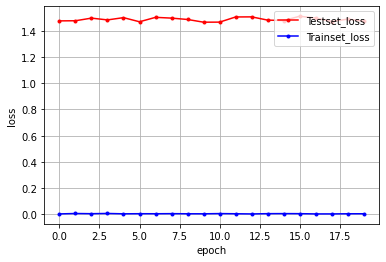

In [368]:
# draw a graph
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len,y_loss, marker='.', c='blue', label='Trainset_loss')
# labeling
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [370]:
y_pred = model.predict(X_test).flatten()
for i in range(10):
    label = y_test[i]
    prediction = y_pred[i]
    print('actual value : {}, predicted value : {}'.format(label,prediction))

9/9 [==============================] - 0s 1ms/step
actual value : 0.46627249488941863, predicted value : 0.2206415832042694
actual value : 0.46627249488941863, predicted value : -0.5318472385406494
actual value : 0.46627249488941863, predicted value : -1.30612051486969
actual value : 0.46627249488941863, predicted value : 0.3162066340446472
actual value : 0.46627249488941863, predicted value : 0.46330755949020386
actual value : 0.46627249488941863, predicted value : -0.6501566171646118
actual value : 0.46627249488941863, predicted value : -1.0501976013183594
actual value : 0.46627249488941863, predicted value : 0.3004269301891327
actual value : 0.46627249488941863, predicted value : 0.07270151376724243
actual value : 0.46627249488941863, predicted value : 0.2996103763580322


In [373]:
y_pred[0]

0.22064158

In [374]:
y_pred[1]

-0.53184724

In [375]:
y_test[0]

0.46627249488941863

In [376]:
y_test[1]

0.46627249488941863

In [377]:
y_test

array([ 0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249, -2.14156407,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249, -2.08393232, -2.14156407,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46627249,
        0.46627249, -2.14156407,  0.46627249,  0.46627249,  0.46627249,
        0.46627249, -2.08393232, -2.08393232,  0.46627249,  0.46627249,
        0.46627249,  0.46627249, -2.32886725,  0.46627249,  0.46627249,
        0.46627249,  0.46627249,  0.46627249, -2.34807783,  0.46627249,
        0.46627249,  0.46627249,  0.46627249,  0.46627249,  0.46

### nov09.2022 2nd trial

In [392]:
X_ = X.values

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.2,random_state=seed)

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.2) # ,random_state=seed

In [439]:
model = Sequential()
# 30, 13, 6
model.add(Dense(90, input_dim=43, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))

In [440]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [401]:
X_.shape

(1432, 43)

In [402]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
108/115 [===========================>..] - ETA: 0s - loss: 55.7655
Epoch 1: val_loss did not improve from 1.46489
115/115 [==============================] - 1s 3ms/step - loss: 52.9388 - val_loss: 4.3332
Epoch 2/200
105/115 [==========================>...] - ETA: 0s - loss: 2.5750
Epoch 2: val_loss did not improve from 1.46489
115/115 [==============================] - 0s 2ms/step - loss: 2.5313 - val_loss: 1.8953
Epoch 3/200
 94/115 [=======================>......] - ETA: 0s - loss: 1.4456
Epoch 3: val_loss improved from 1.46489 to 1.44328, saving model to C:/Users/thsong/dl_model\3-1.4432822465896606.hdf5
115/115 [==============================] - 0s 3ms/step - loss: 1.4158 - val_loss: 1.4433
Epoch 4/200
 92/115 [=======================>......] - ETA: 0s - loss: 1.0744
Epoch 4: val_loss improved from 1.44328 to 1.27315, saving model to C:/Users/thsong/dl_model\4-1.2731479406356812.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 1.0722 - val_loss: 1.273

 90/115 [======================>.......] - ETA: 0s - loss: 0.0734
Epoch 31: val_loss did not improve from 0.35975
115/115 [==============================] - 0s 2ms/step - loss: 0.0729 - val_loss: 0.3606
Epoch 32/200
 79/115 [===================>..........] - ETA: 0s - loss: 0.0597
Epoch 32: val_loss improved from 0.35975 to 0.34362, saving model to C:/Users/thsong/dl_model\32-0.34362176060676575.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.3436
Epoch 33/200
 80/115 [===================>..........] - ETA: 0s - loss: 0.0548
Epoch 33: val_loss did not improve from 0.34362
115/115 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.3521
Epoch 34/200
111/115 [===========================>..] - ETA: 0s - loss: 0.0549
Epoch 34: val_loss did not improve from 0.34362
115/115 [==============================] - 0s 2ms/step - loss: 0.0548 - val_loss: 0.3468
Epoch 35/200
114/115 [============================>.] - ETA: 0s - loss: 0.0

 78/115 [===================>..........] - ETA: 0s - loss: 0.0321
Epoch 64: val_loss did not improve from 0.24849
115/115 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.2796
Epoch 65/200
 77/115 [===================>..........] - ETA: 0s - loss: 0.0431
Epoch 65: val_loss did not improve from 0.24849
115/115 [==============================] - 0s 2ms/step - loss: 0.0443 - val_loss: 0.2519
Epoch 66/200
 79/115 [===================>..........] - ETA: 0s - loss: 0.0472
Epoch 66: val_loss did not improve from 0.24849
115/115 [==============================] - 0s 2ms/step - loss: 0.0476 - val_loss: 0.2680
Epoch 67/200
109/115 [===========================>..] - ETA: 0s - loss: 0.0346
Epoch 67: val_loss did not improve from 0.24849
115/115 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.2817
Epoch 68/200
101/115 [=========================>....] - ETA: 0s - loss: 0.0314
Epoch 68: val_loss did not improve from 0.24849
115/115 [=============

In [441]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
112/115 [============================>.] - ETA: 0s - loss: 41.3867
Epoch 1: val_loss did not improve from 0.23536
115/115 [==============================] - 1s 3ms/step - loss: 40.6009 - val_loss: 3.6395
Epoch 2/200
 92/115 [=======================>......] - ETA: 0s - loss: 2.3430
Epoch 2: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 2.2854 - val_loss: 1.7998
Epoch 3/200
109/115 [===========================>..] - ETA: 0s - loss: 1.3699
Epoch 3: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 1.3932 - val_loss: 1.3698
Epoch 4/200
102/115 [=========================>....] - ETA: 0s - loss: 1.0609
Epoch 4: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 1.0504 - val_loss: 1.2254
Epoch 5/200
101/115 [=========================>....] - ETA: 0s - loss: 0.8287
Epoch 5: val_loss did not improve from 0.23536
115/115 [========

 80/115 [===================>..........] - ETA: 0s - loss: 0.0419
Epoch 39: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0448 - val_loss: 0.3600
Epoch 40/200
 81/115 [====================>.........] - ETA: 0s - loss: 0.0543
Epoch 40: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.3663
Epoch 41/200
 78/115 [===================>..........] - ETA: 0s - loss: 0.0404
Epoch 41: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0416 - val_loss: 0.3328
Epoch 42/200
105/115 [==========================>...] - ETA: 0s - loss: 0.0462
Epoch 42: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0459 - val_loss: 0.3467
Epoch 43/200
 74/115 [==================>...........] - ETA: 0s - loss: 0.0398
Epoch 43: val_loss did not improve from 0.23536
115/115 [=============

Epoch 77/200
106/115 [==========================>...] - ETA: 0s - loss: 0.0495
Epoch 77: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.3136
Epoch 78/200
112/115 [============================>.] - ETA: 0s - loss: 0.0290
Epoch 78: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.2729
Epoch 79/200
106/115 [==========================>...] - ETA: 0s - loss: 0.0219
Epoch 79: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.2851
Epoch 80/200
108/115 [===========================>..] - ETA: 0s - loss: 0.0214
Epoch 80: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.2717
Epoch 81/200
110/115 [===========================>..] - ETA: 0s - loss: 0.0164
Epoch 81: val_loss did not improve from 0.23536
115/115 [

In [403]:
# loss of test set
y_vloss = history.history['val_loss']
# loss of training set
y_loss = history.history['loss']

In [442]:
# loss of test set
y_vloss = history.history['val_loss']
# loss of training set
y_loss = history.history['loss']

In [404]:
history.history

{'loss': [52.93877410888672,
  2.531266450881958,
  1.415804147720337,
  1.072220802307129,
  0.8748476505279541,
  0.7403120398521423,
  0.621107280254364,
  0.5393144488334656,
  0.47571030259132385,
  0.41207951307296753,
  0.3652612864971161,
  0.32559388875961304,
  0.3158716559410095,
  0.2665134370326996,
  0.24888798594474792,
  0.22370178997516632,
  0.20095960795879364,
  0.18349283933639526,
  0.1794971227645874,
  0.15784239768981934,
  0.1446932703256607,
  0.13413041830062866,
  0.11865273118019104,
  0.11305079609155655,
  0.10659519582986832,
  0.09905378520488739,
  0.08894309401512146,
  0.08534999936819077,
  0.07503041625022888,
  0.07232360541820526,
  0.07289407402276993,
  0.06184305250644684,
  0.05809566006064415,
  0.05477094650268555,
  0.055542394518852234,
  0.04630221426486969,
  0.04752421751618385,
  0.04169488325715065,
  0.03869469836354256,
  0.03684030845761299,
  0.03530373424291611,
  0.04130774363875389,
  0.03669031709432602,
  0.0297784470021724

In [443]:
history.history

{'loss': [40.60085678100586,
  2.2854065895080566,
  1.3931750059127808,
  1.0503723621368408,
  0.8409615159034729,
  0.6980590224266052,
  0.5812558531761169,
  0.5017775893211365,
  0.44884246587753296,
  0.38420331478118896,
  0.3430429995059967,
  0.29882195591926575,
  0.2961505353450775,
  0.24765321612358093,
  0.23367559909820557,
  0.2090335637331009,
  0.19235515594482422,
  0.17759694159030914,
  0.17084649205207825,
  0.1461707502603531,
  0.13542336225509644,
  0.12670913338661194,
  0.11961156874895096,
  0.10961097478866577,
  0.1020369753241539,
  0.09247467666864395,
  0.08314376324415207,
  0.08489452302455902,
  0.08416040986776352,
  0.07643108814954758,
  0.07261424511671066,
  0.06903411448001862,
  0.06296268105506897,
  0.0560808926820755,
  0.05896708369255066,
  0.051750365644693375,
  0.04946022480726242,
  0.041940078139305115,
  0.04481746256351471,
  0.05379512533545494,
  0.04159554839134216,
  0.045909732580184937,
  0.03988318145275116,
  0.03702682256

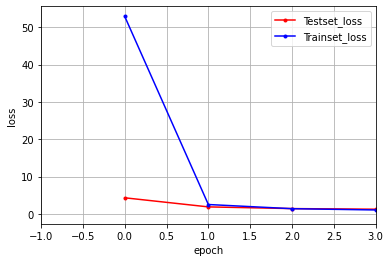

In [420]:
##### 2nd -1 trial #####
# draw a graph
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len,y_loss, marker='.', c='blue', label='Trainset_loss')
#------------------
plt.xlim(-1,3)
#------------------
# labeling
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

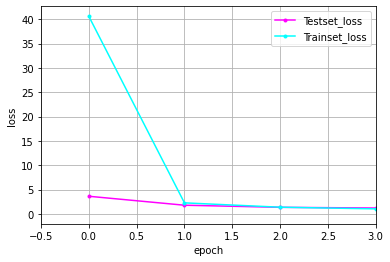

In [445]:
##### 2nd - 2 trial #####
# draw a graph
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker='.', c='magenta', label='Testset_loss')
plt.plot(x_len,y_loss, marker='.', c='cyan', label='Trainset_loss')
#------------------
plt.xlim(-0.5,3)
#------------------
# labeling
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [412]:
y_test

1149    12.049425
233     11.402005
1310    11.813037
202     11.608245
362     11.790565
          ...    
666     11.763692
991     11.813037
896     12.065281
511     11.976666
1248    12.132162
Name: SalePrice(log), Length: 287, dtype: float64

In [417]:
y_test_ = y_test.reset_index(drop=True)

In [418]:
y_test_

0      12.049425
1      11.402005
2      11.813037
3      11.608245
4      11.790565
         ...    
282    11.763692
283    11.813037
284    12.065281
285    11.976666
286    12.132162
Name: SalePrice(log), Length: 287, dtype: float64

In [422]:
y_pred = model.predict(X_test).flatten()
for i in range(10):
    label = y_test_[i]
    prediction = y_pred[i]
    print('actual value : {}, predicted value : {}'.format(label,prediction))
    #---------------------
    log_y = np.log1p(label)
    log_pred = np.log1p(prediction)
    squared_error = (log_y - log_pred)**2 
    rmsle = np.sqrt(np.mean(squared_error))
    # print RMSLE value
    print('RMSLE : {}'.format(rmsle))

9/9 [==============================] - 0s 1ms/step
actual value : 12.049424683420915, predicted value : 11.20196533203125
RMSLE : 0.06714711959246733
actual value : 11.402005077384885, predicted value : 11.205520629882812
RMSLE : 0.015969884181608496
actual value : 11.813037464800539, predicted value : 11.878381729125977
RMSLE : 0.005086893928138103
actual value : 11.608244735642321, predicted value : 11.644471168518066
RMSLE : 0.002869057154430088
actual value : 11.790564777297387, predicted value : 12.102509498596191
RMSLE : 0.024095963392623876
actual value : 11.652696102959753, predicted value : 12.014906883239746
RMSLE : 0.02822502903968127
actual value : 11.744045122410057, predicted value : 11.444244384765625
RMSLE : 0.023805997511801902
actual value : 11.914054519303125, predicted value : 12.145221710205078
RMSLE : 0.017742171840128496
actual value : 12.433212202169729, predicted value : 13.06308650970459
RMSLE : 0.045823332371440983
actual value : 12.614868865984631, predicted

In [447]:
y_pred = model.predict(X_test).flatten()
for i in range(10):
    label = y_test_[i]
    prediction = y_pred[i]
    print('actual value : {}, predicted value : {}'.format(label,prediction))
    #---------------------
    log_y = np.log1p(label)
    log_pred = np.log1p(prediction)
    squared_error = (log_y - log_pred)**2 
    rmsle = np.sqrt(np.mean(squared_error))
    # print RMSLE value
    print('RMSLE : {}'.format(rmsle))

9/9 [==============================] - 0s 1ms/step
actual value : 12.049424683420915, predicted value : 11.418205261230469
RMSLE : 0.049580438684264205
actual value : 11.402005077384885, predicted value : 11.806051254272461
RMSLE : 0.03205953857840127
actual value : 11.813037464800539, predicted value : 12.287766456604004
RMSLE : 0.03638052452811369
actual value : 11.608244735642321, predicted value : 11.782094955444336
RMSLE : 0.013694452738536533
actual value : 11.790564777297387, predicted value : 12.115583419799805
RMSLE : 0.025093268309005712
actual value : 11.652696102959753, predicted value : 12.331023216247559
RMSLE : 0.05222352795630725
actual value : 11.744045122410057, predicted value : 11.4934720993042
RMSLE : 0.019857785841880027
actual value : 11.914054519303125, predicted value : 12.26473617553711
RMSLE : 0.02679277952140291
actual value : 12.433212202169729, predicted value : 12.49976921081543
RMSLE : 0.004942413868633366
actual value : 12.614868865984631, predicted val

In [437]:
print('Test Accuracy : %.4f' % (model.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.2463
Test Accuracy : 0.2463


In [448]:
print('Test Accuracy : %.4f' % (model.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.2588
Test Accuracy : 0.2588


In [429]:
df_house4.columns[106:]

Index(['MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorc

In [432]:
len(df_house4.columns[106:]),len(df_house_test_extracted.columns)

(44, 42)

In [423]:
df_house_test_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg'],
      dtype='object')

In [433]:
df_house_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [434]:
df_house_test_extracted_ = pd.concat([df_house_test_extracted,df_house_test[['SaleCondition_']]],axis=1)
#--------------------------------------------------------------------------
col_lst = [
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg','SaleCondition_'
] 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted_[new_col] = scaled_data_tst
###====================================================================
###====================================================================

In [435]:
df_house_test_extracted_.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SaleCondition_', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotShape_(scaled)', 'LotConfig_(scaled)', 'Neighborhood_(scaled)',
       'HouseStyle_(scaled)', 'OverallQual(scaled)', 'OverallCond(scaled)',
       'RoofStyle_(scaled)', 'MasVnrType_(scaled)', 'MasVnrArea(s

In [436]:
###================================================
df_house_test_extracted2b_predicted = df_house_test_extracted_[[
    'MSSubClass(scaled)', 'MSZoning_(scaled)',
       'LotFrontage(scaled)', 'LotArea(scaled)', 'LotShape_(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrType_(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'Foundation_(scaled)', 'BsmtQual_(scaled)', 'BsmtExposure_(scaled)',
       'BsmtFinType1_(scaled)', 'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)',
       'TotalBsmtSF(scaled)', 'HeatingQC_(scaled)', '1stFlrSF(scaled)',
       '2ndFlrSF(scaled)', 'GrLivArea(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'GarageType_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'GarageFinish_(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'WoodDeckSF(scaled)', 'OpenPorchSF(scaled)',
       'Exterior_Avg(scaled)', 'SaleCondition_(scaled)'   
]]

result_from_model = model.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_1.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,171624.828125
1,1462,168963.531250
2,1463,324405.468750
3,1464,281467.343750
4,1465,148777.015625
...,...,...
1454,2915,103821.000000
1455,2916,80317.828125
1456,2917,248136.578125
1457,2918,171947.906250


In [449]:
result_from_model = model.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_2.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,325292.437500
1,1462,187595.000000
2,1463,256414.281250
3,1464,482726.125000
4,1465,145303.265625
...,...,...
1454,2915,37518.449219
1455,2916,94276.750000
1456,2917,353294.687500
1457,2918,89503.507812


### nov09.2022 3rd trial

In [451]:
len(X.columns)

43

In [452]:
model3 = Sequential()
#--------------------------------------------
model3.add(Dense(128, input_shape=(43,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
#----------------------------------
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
#----------------------------------
model3.add(Dense(16))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
#----------------------------------
model3.add(Dense(1))

In [453]:
model3.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [455]:
history2 = model3.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
103/115 [=========================>....] - ETA: 0s - loss: 73.0300 - mse: 73.0300 
Epoch 1: val_loss did not improve from 0.23536
115/115 [==============================] - 1s 3ms/step - loss: 70.0254 - mse: 70.0254 - val_loss: 17.3411 - val_mse: 17.3411
Epoch 2/200
 99/115 [========================>.....] - ETA: 0s - loss: 33.3807 - mse: 33.3807
Epoch 2: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 32.8859 - mse: 32.8859 - val_loss: 7.4582 - val_mse: 7.4582
Epoch 3/200
111/115 [===========================>..] - ETA: 0s - loss: 25.5984 - mse: 25.5984
Epoch 3: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 25.3744 - mse: 25.3744 - val_loss: 5.0611 - val_mse: 5.0611
Epoch 4/200
108/115 [===========================>..] - ETA: 0s - loss: 24.9384 - mse: 24.9384
Epoch 4: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 2

In [456]:
# loss of test set
y_vloss2 = history2.history['val_loss']
# loss of training set
y_loss2 = history2.history['loss']

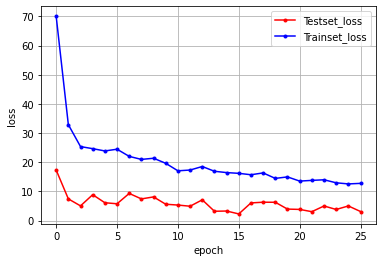

In [458]:
##### 3rd -1 trial #####
# draw a graph
x_len = np.arange(len(y_loss2))
plt.plot(x_len,y_vloss2, marker='.', c='red', label='Testset_loss')
plt.plot(x_len,y_loss2, marker='.', c='blue', label='Trainset_loss')
#------------------
#plt.xlim(-1,3)
#------------------
# labeling
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [461]:
model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3.1312 - mse: 3.1312


[3.1311817169189453, 3.1311817169189453]

In [462]:
model3_2 = Sequential()
#--------------------------------------------
model3_2.add(Dense(128, input_shape=(43,)))
model3_2.add(Activation('relu'))
#model3_2.add(Dropout(0.5))
#----------------------------------
model3_2.add(Dense(64))
model3_2.add(Activation('relu'))
#model3_2.add(Dropout(0.5))
#----------------------------------
model3_2.add(Dense(16))
model3_2.add(Activation('relu'))
#model3_2.add(Dropout(0.5))
#----------------------------------
model3_2.add(Dense(1))

In [463]:
model3_2.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')

In [464]:
history3_2 = model3_2.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
105/115 [==========================>...] - ETA: 0s - loss: 24.2270 - mse: 24.2270 
Epoch 1: val_loss did not improve from 0.23536
115/115 [==============================] - 1s 3ms/step - loss: 22.3932 - mse: 22.3932 - val_loss: 2.1540 - val_mse: 2.1540
Epoch 2/200
105/115 [==========================>...] - ETA: 0s - loss: 1.5185 - mse: 1.5185
Epoch 2: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 1.5106 - mse: 1.5106 - val_loss: 1.5162 - val_mse: 1.5162
Epoch 3/200
100/115 [=========================>....] - ETA: 0s - loss: 1.0165 - mse: 1.0165
Epoch 3: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.2337 - val_mse: 1.2337
Epoch 4/200
 95/115 [=======================>......] - ETA: 0s - loss: 0.7629 - mse: 0.7629
Epoch 4: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.7746 - mse:

109/115 [===========================>..] - ETA: 0s - loss: 0.0401 - mse: 0.0401
Epoch 32: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.4096 - val_mse: 0.4096
Epoch 33/200
 98/115 [========================>.....] - ETA: 0s - loss: 0.0387 - mse: 0.0387
Epoch 33: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.4195 - val_mse: 0.4195
Epoch 34/200
102/115 [=========================>....] - ETA: 0s - loss: 0.0425 - mse: 0.0425
Epoch 34: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.4310 - val_mse: 0.4310
Epoch 35/200
104/115 [==========================>...] - ETA: 0s - loss: 0.0401 - mse: 0.0401
Epoch 35: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0398 - mse: 0.0398 - 

 92/115 [=======================>......] - ETA: 0s - loss: 0.0534 - mse: 0.0534
Epoch 63: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0501 - mse: 0.0501 - val_loss: 0.3345 - val_mse: 0.3345
Epoch 64/200
115/115 [==============================] - ETA: 0s - loss: 0.0301 - mse: 0.0301
Epoch 64: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.3080 - val_mse: 0.3080
Epoch 65/200
103/115 [=========================>....] - ETA: 0s - loss: 0.0271 - mse: 0.0271
Epoch 65: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.3052 - val_mse: 0.3052
Epoch 66/200
106/115 [==========================>...] - ETA: 0s - loss: 0.0370 - mse: 0.0370
Epoch 66: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0375 - mse: 0.0375 - 

 93/115 [=======================>......] - ETA: 0s - loss: 0.0523 - mse: 0.0523
Epoch 94: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0550 - mse: 0.0550 - val_loss: 0.2947 - val_mse: 0.2947
Epoch 95/200
102/115 [=========================>....] - ETA: 0s - loss: 0.0915 - mse: 0.0915
Epoch 95: val_loss did not improve from 0.23536
115/115 [==============================] - 0s 2ms/step - loss: 0.0867 - mse: 0.0867 - val_loss: 0.2869 - val_mse: 0.2869


In [465]:
# loss of test set
y_vloss3_2 = history3_2.history['val_loss']
# loss of training set
y_loss3_2 = history3_2.history['loss']

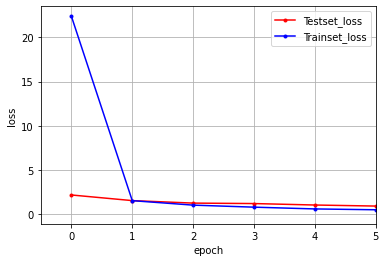

In [468]:
##### 3rd - 2 trial #####
# draw a graph
x_len = np.arange(len(y_loss3_2))
plt.plot(x_len,y_vloss3_2, marker='.', c='red', label='Testset_loss')
plt.plot(x_len,y_loss3_2, marker='.', c='blue', label='Trainset_loss')
#------------------
plt.xlim(-0.5,5)
#------------------
# labeling
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [473]:
print('Test Accuracy : {}'.format(model3_2.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 2ms/step - loss: 0.2869 - mse: 0.2869
Test Accuracy : [0.2869018614292145, 0.2869018614292145]


In [469]:
result_from_model = model3_2.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_2.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,287004.031250
1,1462,100139.734375
2,1463,210437.250000
3,1464,225651.125000
4,1465,141183.437500
...,...,...
1454,2915,42633.191406
1455,2916,44655.222656
1456,2917,402929.312500
1457,2918,123030.039062


In [474]:
model3_3 = Sequential()
#--------------------------------------------
model3_3.add(Dense(64, input_shape=(43,)))
model3_3.add(Activation('relu'))
#----------------------------------
model3_3.add(Dense(32))
model3_3.add(Activation('relu'))
#----------------------------------
model3_3.add(Dense(8))
model3_3.add(Activation('relu'))
#----------------------------------
model3_3.add(Dense(1))

In [477]:
model3_3.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history3_3 = model3_3.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
107/115 [==========================>...] - ETA: 0s - loss: 40.7725 - mse: 40.7725 
Epoch 1: val_loss did not improve from 0.22063
115/115 [==============================] - 1s 3ms/step - loss: 38.3935 - mse: 38.3935 - val_loss: 3.3214 - val_mse: 3.3214
Epoch 2/200
105/115 [==========================>...] - ETA: 0s - loss: 1.9691 - mse: 1.9691
Epoch 2: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 1.9499 - mse: 1.9499 - val_loss: 1.7067 - val_mse: 1.7067
Epoch 3/200
104/115 [==========================>...] - ETA: 0s - loss: 1.2342 - mse: 1.2342
Epoch 3: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 1.2559 - mse: 1.2559 - val_loss: 1.3372 - val_mse: 1.3372
Epoch 4/200
103/115 [=========================>....] - ETA: 0s - loss: 1.0209 - mse: 1.0209
Epoch 4: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 1.0197 - mse:

104/115 [==========================>...] - ETA: 0s - loss: 0.0690 - mse: 0.0690
Epoch 32: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.3952 - val_mse: 0.3952
Epoch 33/200
107/115 [==========================>...] - ETA: 0s - loss: 0.0653 - mse: 0.0653
Epoch 33: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0658 - mse: 0.0658 - val_loss: 0.3717 - val_mse: 0.3717
Epoch 34/200
108/115 [===========================>..] - ETA: 0s - loss: 0.0600 - mse: 0.0600
Epoch 34: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.3899 - val_mse: 0.3899
Epoch 35/200
111/115 [===========================>..] - ETA: 0s - loss: 0.0613 - mse: 0.0613
Epoch 35: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0609 - mse: 0.0609 - 

106/115 [==========================>...] - ETA: 0s - loss: 0.0344 - mse: 0.0344
Epoch 63: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.3035 - val_mse: 0.3035
Epoch 64/200
109/115 [===========================>..] - ETA: 0s - loss: 0.0290 - mse: 0.0290
Epoch 64: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.3273 - val_mse: 0.3273
Epoch 65/200
110/115 [===========================>..] - ETA: 0s - loss: 0.0383 - mse: 0.0383
Epoch 65: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.3178 - val_mse: 0.3178
Epoch 66/200
110/115 [===========================>..] - ETA: 0s - loss: 0.0290 - mse: 0.0290
Epoch 66: val_loss did not improve from 0.22063
115/115 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - 

In [484]:
model3_3.compile(loss='mean_squared_error', metrics=['mse'], optimizer='SGD')
history3_3 = model3_3.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
 80/115 [===================>..........] - ETA: 0s - loss: 48.9494 - mse: 48.9494
Epoch 1: val_loss did not improve from 0.22063
115/115 [==============================] - 1s 3ms/step - loss: 35.3759 - mse: 35.3759 - val_loss: 1.8674 - val_mse: 1.8674
Epoch 2/200
 75/115 [==================>...........] - ETA: 0s - loss: 0.7094 - mse: 0.7094
Epoch 2: val_loss improved from 0.22063 to 0.15666, saving model to C:/Users/thsong/dl_model\2-0.1566554754972458.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 0.5286 - mse: 0.5286 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 3/200
114/115 [============================>.] - ETA: 0s - loss: 0.1598 - mse: 0.1598
Epoch 3: val_loss improved from 0.15666 to 0.13732, saving model to C:/Users/thsong/dl_model\3-0.1373203545808792.hdf5
115/115 [==============================] - 0s 2ms/step - loss: 0.1593 - mse: 0.1593 - val_loss: 0.1373 - val_mse: 0.1373
Epoch 4/200
 77/115 [===================>..........] - ETA: 0s - loss: 0

In [478]:
print('Test Accuracy : {}'.format(model3_3.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.2643 - mse: 0.2643
Test Accuracy : [0.26432883739471436, 0.26432883739471436]


In [483]:
# RMS Prop
print('Test Accuracy : {}'.format(model3_3.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.2500 - mse: 0.2500
Test Accuracy : [0.249980166554451, 0.249980166554451]


In [485]:
# SGD
print('Test Accuracy : {}'.format(model3_3.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.1370 - mse: 0.1370
Test Accuracy : [0.13696162402629852, 0.13696162402629852]


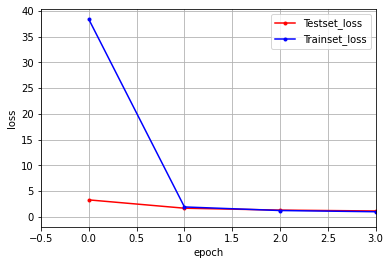

In [480]:
# loss of test set
y_vloss3_3 = history3_3.history['val_loss']
# loss of training set
y_loss3_3 = history3_3.history['loss']
#---------------------------------------------
##### 3rd - 3 trial #####
# draw a graph
x_len = np.arange(len(y_loss3_3))
plt.plot(x_len,y_vloss3_3, marker='.', c='red', label='Testset_loss')
plt.plot(x_len,y_loss3_3, marker='.', c='blue', label='Trainset_loss')
#------------------
plt.xlim(-0.5,3)
#------------------
# labeling
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [481]:
result_from_model = model3_3.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_2.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,93667.515625
1,1462,85401.382812
2,1463,291318.312500
3,1464,404094.937500
4,1465,201270.484375
...,...,...
1454,2915,42800.667969
1455,2916,61840.179688
1456,2917,234762.062500
1457,2918,78696.523438


In [509]:
### 3rd - 4 trial ###
model3_4 = Sequential()
#--------------------------------------------
model3_4.add(Dense(1024, input_shape=(43,)))
model3_4.add(Activation('relu'))
#----------------------------------
model3_4.add(Dense(256, input_shape=(43,)))
model3_4.add(Activation('relu'))
#----------------------------------
model3_4.add(Dense(64, input_shape=(43,)))
model3_4.add(Activation('relu'))
#----------------------------------
model3_4.add(Dense(16))
model3_4.add(Activation('relu'))
#----------------------------------
model3_4.add(Dense(4))
model3_4.add(Activation('relu'))
#----------------------------------
model3_4.add(Dense(1))
model3_4.add(Activation('elu'))
#==================================================================================
model3_4.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history3_4 = model3_4.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=300, batch_size=20, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/300
58/58 [==============================] - ETA: 0s - loss: 14.7541 - mse: 14.7541
Epoch 1: val_loss did not improve from 0.04271
58/58 [==============================] - 1s 7ms/step - loss: 14.7541 - mse: 14.7541 - val_loss: 1.4385 - val_mse: 1.4385
Epoch 2/300
57/58 [============================>.] - ETA: 0s - loss: 1.0241 - mse: 1.0241
Epoch 2: val_loss did not improve from 0.04271
58/58 [==============================] - 0s 4ms/step - loss: 1.0261 - mse: 1.0261 - val_loss: 1.0981 - val_mse: 1.0981
Epoch 3/300
57/58 [============================>.] - ETA: 0s - loss: 0.6850 - mse: 0.6850
Epoch 3: val_loss did not improve from 0.04271
58/58 [==============================] - 0s 4ms/step - loss: 0.6844 - mse: 0.6844 - val_loss: 0.8615 - val_mse: 0.8615
Epoch 4/300
52/58 [=========================>....] - ETA: 0s - loss: 0.5439 - mse: 0.5439
Epoch 4: val_loss did not improve from 0.04271
58/58 [==============================] - 0s 5ms/step - loss: 0.5447 - mse: 0.5447 - val_los

Epoch 33/300
50/58 [========================>.....] - ETA: 0s - loss: 0.0841 - mse: 0.0841
Epoch 33: val_loss did not improve from 0.04271
58/58 [==============================] - 0s 4ms/step - loss: 0.0840 - mse: 0.0840 - val_loss: 0.4007 - val_mse: 0.4007
Epoch 34/300
49/58 [========================>.....] - ETA: 0s - loss: 0.0922 - mse: 0.0922
Epoch 34: val_loss did not improve from 0.04271
58/58 [==============================] - 0s 4ms/step - loss: 0.0947 - mse: 0.0947 - val_loss: 0.4033 - val_mse: 0.4033
Epoch 35/300
50/58 [========================>.....] - ETA: 0s - loss: 0.1147 - mse: 0.1147
Epoch 35: val_loss did not improve from 0.04271
58/58 [==============================] - 0s 4ms/step - loss: 0.1137 - mse: 0.1137 - val_loss: 0.3709 - val_mse: 0.3709
Epoch 36/300
44/58 [=====================>........] - ETA: 0s - loss: 0.1339 - mse: 0.1339
Epoch 36: val_loss did not improve from 0.04271
58/58 [==============================] - 0s 4ms/step - loss: 0.1324 - mse: 0.1324 - val

In [506]:
print('Test Accuracy : {}'.format(model3_4.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 3ms/step - loss: 0.4191 - mse: 0.4191
Test Accuracy : [0.4191492795944214, 0.4191492795944214]


In [508]:
print('Test Accuracy : {}'.format(model3_4.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 2ms/step - loss: 0.0605 - mse: 0.0605
Test Accuracy : [0.0604710578918457, 0.0604710578918457]


In [510]:
print('Test Accuracy : {}'.format(model3_4.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 2ms/step - loss: 0.3012 - mse: 0.3012
Test Accuracy : [0.30116891860961914, 0.30116891860961914]


In [516]:
result_from_model = model3_4.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_2.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 2ms/step


,Id,SalePrice
0,1461,238171.765625
1,1462,101936.382812
2,1463,175452.203125
3,1464,375964.843750
4,1465,173549.390625
...,...,...
1454,2915,44481.507812
1455,2916,47049.640625
1456,2917,217682.031250
1457,2918,81919.085938


In [512]:
### 3rd - 5 trial ###
model3_5 = Sequential()
#--------------------------------------------
model3_5.add(Dense(1024, input_shape=(43,)))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(512, input_shape=(43,)))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(256, input_shape=(43,)))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(128, input_shape=(43,)))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(64, input_shape=(43,)))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(32, input_shape=(43,)))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(16))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(8, input_shape=(43,)))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(4))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(2))
model3_5.add(Activation('relu'))
#----------------------------------
model3_5.add(Dense(1))
model3_5.add(Activation('elu'))
#==================================================================================
model3_5.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history3_5 = model3_5.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=500, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/500
110/115 [===========================>..] - ETA: 0s - loss: 143.1955 - mse: 143.1955
Epoch 1: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 7ms/step - loss: 143.0958 - mse: 143.0958 - val_loss: 142.0612 - val_mse: 142.0612
Epoch 2/500
109/115 [===========================>..] - ETA: 0s - loss: 140.4288 - mse: 140.4288
Epoch 2: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 140.3688 - mse: 140.3688 - val_loss: 139.3521 - val_mse: 139.3521
Epoch 3/500
111/115 [===========================>..] - ETA: 0s - loss: 137.6163 - mse: 137.6163
Epoch 3: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 137.6812 - mse: 137.6812 - val_loss: 136.6801 - val_mse: 136.6801
Epoch 4/500
111/115 [===========================>..] - ETA: 0s - loss: 134.9911 - mse: 134.9911
Epoch 4: val_loss did not improve from 0.04271
115/115 [==============================] 

113/115 [============================>.] - ETA: 0s - loss: 75.6479 - mse: 75.6479
Epoch 31: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 75.6182 - mse: 75.6182 - val_loss: 74.9495 - val_mse: 74.9495
Epoch 32/500
110/115 [===========================>..] - ETA: 0s - loss: 73.9249 - mse: 73.9249
Epoch 32: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 73.8099 - mse: 73.8099 - val_loss: 73.1510 - val_mse: 73.1511
Epoch 33/500
113/115 [============================>.] - ETA: 0s - loss: 72.0014 - mse: 72.0014
Epoch 33: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 72.0268 - mse: 72.0268 - val_loss: 71.3778 - val_mse: 71.3778
Epoch 34/500
110/115 [===========================>..] - ETA: 0s - loss: 70.3313 - mse: 70.3313
Epoch 34: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 70.

Epoch 62/500
112/115 [============================>.] - ETA: 0s - loss: 30.7553 - mse: 30.7553
Epoch 62: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 30.7369 - mse: 30.7369 - val_loss: 30.3391 - val_mse: 30.3391
Epoch 63/500
110/115 [===========================>..] - ETA: 0s - loss: 29.6541 - mse: 29.6541
Epoch 63: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 29.6572 - mse: 29.6572 - val_loss: 29.2678 - val_mse: 29.2678
Epoch 64/500
114/115 [============================>.] - ETA: 0s - loss: 28.6125 - mse: 28.6125
Epoch 64: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 28.5997 - mse: 28.5997 - val_loss: 28.2179 - val_mse: 28.2179
Epoch 65/500
112/115 [============================>.] - ETA: 0s - loss: 27.6117 - mse: 27.6117
Epoch 65: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/ste

Epoch 93/500
115/115 [==============================] - ETA: 0s - loss: 7.0881 - mse: 7.0881
Epoch 93: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 7.0881 - mse: 7.0881 - val_loss: 6.9214 - val_mse: 6.9214
Epoch 94/500
109/115 [===========================>..] - ETA: 0s - loss: 6.6466 - mse: 6.6466
Epoch 94: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 6.6428 - mse: 6.6428 - val_loss: 6.4833 - val_mse: 6.4833
Epoch 95/500
114/115 [============================>.] - ETA: 0s - loss: 6.2090 - mse: 6.2090
Epoch 95: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 6.2156 - mse: 6.2156 - val_loss: 6.0621 - val_mse: 6.0621
Epoch 96/500
115/115 [==============================] - ETA: 0s - loss: 5.8060 - mse: 5.8060
Epoch 96: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 5.8060 - m

114/115 [============================>.] - ETA: 0s - loss: 0.3645 - mse: 0.3645
Epoch 124: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 7ms/step - loss: 0.3655 - mse: 0.3655 - val_loss: 0.3401 - val_mse: 0.3401
Epoch 125/500
109/115 [===========================>..] - ETA: 0s - loss: 0.3306 - mse: 0.3306
Epoch 125: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 7ms/step - loss: 0.3270 - mse: 0.3270 - val_loss: 0.3028 - val_mse: 0.3028
Epoch 126/500
107/115 [==========================>...] - ETA: 0s - loss: 0.2972 - mse: 0.2972
Epoch 126: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 7ms/step - loss: 0.2941 - mse: 0.2941 - val_loss: 0.2713 - val_mse: 0.2713
Epoch 127/500
114/115 [============================>.] - ETA: 0s - loss: 0.2655 - mse: 0.2655
Epoch 127: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 0.2663 - mse: 0.

106/115 [==========================>...] - ETA: 0s - loss: 0.1538 - mse: 0.1538
Epoch 155: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 0.1555 - mse: 0.1555 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 156/500
106/115 [==========================>...] - ETA: 0s - loss: 0.1548 - mse: 0.1548
Epoch 156: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 0.1556 - mse: 0.1556 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 157/500
113/115 [============================>.] - ETA: 0s - loss: 0.1558 - mse: 0.1558
Epoch 157: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 0.1556 - mse: 0.1556 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 158/500
112/115 [============================>.] - ETA: 0s - loss: 0.1561 - mse: 0.1561
Epoch 158: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 0.1555 - mse: 0.

In [513]:
print('Test Accuracy : {}'.format(model3_5.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 3ms/step - loss: 0.1368 - mse: 0.1368
Test Accuracy : [0.13679854571819305, 0.13679854571819305]


In [517]:
result_from_model = model3_5.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_2.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 3ms/step


,Id,SalePrice
0,1461,164423.25
1,1462,164423.25
2,1463,164423.25
3,1464,164423.25
4,1465,164423.25
...,...,...
1454,2915,164423.25
1455,2916,164423.25
1456,2917,164423.25
1457,2918,164423.25


In [514]:
### 3rd - 6 trial ###
model3_6 = Sequential()
#--------------------------------------------
model3_6.add(Dense(2048, input_shape=(43,)))
model3_6.add(Activation('relu'))
#----------------------------------
model3_6.add(Dense(256, input_shape=(43,)))
model3_6.add(Activation('relu'))
#----------------------------------
model3_6.add(Dense(32, input_shape=(43,)))
model3_6.add(Activation('relu'))
#----------------------------------
model3_6.add(Dense(4))
model3_6.add(Activation('relu'))
#----------------------------------
model3_6.add(Dense(1))
#model3_6.add(Activation('elu'))
#==================================================================================
model3_6.compile(loss='mean_squared_error', metrics=['mse'], optimizer='adam')
history3_6 = model3_6.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=300, batch_size=10, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/300
109/115 [===========================>..] - ETA: 0s - loss: 11.5434 - mse: 11.5434
Epoch 1: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 11.0532 - mse: 11.0532 - val_loss: 1.2786 - val_mse: 1.2786
Epoch 2/300
105/115 [==========================>...] - ETA: 0s - loss: 0.8907 - mse: 0.8907
Epoch 2: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 0.8975 - mse: 0.8975 - val_loss: 1.1460 - val_mse: 1.1460
Epoch 3/300
108/115 [===========================>..] - ETA: 0s - loss: 0.5650 - mse: 0.5650
Epoch 3: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 6ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.6399 - val_mse: 0.6399
Epoch 4/300
109/115 [===========================>..] - ETA: 0s - loss: 0.4381 - mse: 0.4381
Epoch 4: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 5ms/step - loss: 0.4462 - mse: 

109/115 [===========================>..] - ETA: 0s - loss: 0.0721 - mse: 0.0721
Epoch 32: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 5ms/step - loss: 0.0715 - mse: 0.0715 - val_loss: 0.2307 - val_mse: 0.2307
Epoch 33/300
108/115 [===========================>..] - ETA: 0s - loss: 0.0712 - mse: 0.0712
Epoch 33: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 5ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.2478 - val_mse: 0.2478
Epoch 34/300
112/115 [============================>.] - ETA: 0s - loss: 0.1328 - mse: 0.1328
Epoch 34: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 5ms/step - loss: 0.1346 - mse: 0.1346 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 35/300
111/115 [===========================>..] - ETA: 0s - loss: 0.3211 - mse: 0.3211
Epoch 35: val_loss did not improve from 0.04271
115/115 [==============================] - 1s 5ms/step - loss: 0.3162 - mse: 0.3162 - 

In [515]:
print('Test Accuracy : {}'.format(model3_6.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 2ms/step - loss: 0.2755 - mse: 0.2755
Test Accuracy : [0.2755107581615448, 0.2755107581615448]


In [518]:
result_from_model = model3_6.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_2.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 2ms/step


,Id,SalePrice
0,1461,185056.484375
1,1462,89802.250000
2,1463,161848.625000
3,1464,229686.890625
4,1465,157986.031250
...,...,...
1454,2915,35227.820312
1455,2916,56020.710938
1456,2917,221536.203125
1457,2918,74549.679688


### trial - backpropagation

In [519]:
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp
#-----------------------------------------------
# # Load a CSV file
# def load_csv(filename):
# 	dataset = list()
# 	with open(filename, 'r') as file:
# 		csv_reader = reader(file)
# 		for row in csv_reader:
# 			if not row:
# 				continue
# 			dataset.append(row)
# 	return dataset
 
# # Convert string column to float
# def str_column_to_float(dataset, column):
# 	for row in dataset:
# 		row[column] = float(row[column].strip())
 
# # Convert string column to integer
# def str_column_to_int(dataset, column):
# 	class_values = [row[column] for row in dataset]
# 	unique = set(class_values)
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for row in dataset:
# 		row[column] = lookup[row[column]]
# 	return lookup
 
# # Find the min and max values for each column
# def dataset_minmax(dataset):
# 	minmax = list()
# 	stats = [[min(column), max(column)] for column in zip(*dataset)]
# 	return stats
 
# # Rescale dataset columns to the range 0-1
# def normalize_dataset(dataset, minmax):
# 	for row in dataset:
# 		for i in range(len(row)-1):
# 			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
#--------------------------------------------------------------------------------

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(neuron['output'] - expected[j])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] -= l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network
 
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))
 
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(predictions)

In [ ]:
# Test Backprop on Seeds dataset
seed(1)
#-------------------------------------------
# # load and prepare data
# filename = 'seeds_dataset.csv'
# dataset = load_csv(filename)
# for i in range(len(dataset[0])-1):
#     str_column_to_float(dataset, i)
# # convert class column to integers
# str_column_to_int(dataset, len(dataset[0])-1)
#---------------------------------------------------
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

In [522]:
X.columns

Index(['MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorc

In [ ]:
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

### Back propagation - Regression

In [532]:
from sklearn import preprocessing as pre
from sklearn.utils import shuffle

In [540]:
import time

In [537]:
ccip_dataset_tst = pd.read_excel('C:/Users/thsong/CCPP/CCPP/Folds5x2_pp.xlsx')

In [538]:
ccip_dataset_tst.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


...............Reading the Dataset  and Dataset Pre-Processing ................
Time Cost for Pre-processing and Reading the Dataset: 0.010970 seconds 
 
............... Initializing hyperparameters ................
............... Setting 4 weights for hidden layers ................
Time Cost for Setting HyperParameters: 0.001994 seconds 
 
............... Training Backpropagation Algorithm ................
Training RMSE: 4.55
Time Cost for Training algorithm: 12.539735 seconds 
 
............... Plotting RMSE Curve ................


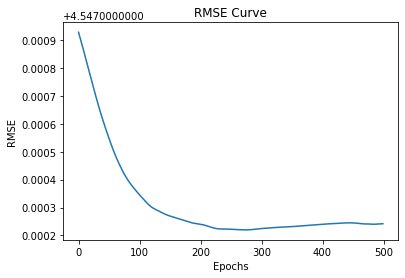


............... Testing Backpropagation Algorithm ................
Testing RMSE: 4.54
Time Cost for Testing algorithm: 0.003990 seconds 
 
[[-0.99997098]
 [-0.99997287]
 [ 0.99997352]
 ...
 [ 0.99997239]
 [ 0.99997194]
 [ 0.99997229]]


In [542]:
'''
This Back-propagation algorithm is implemented on Combined Cycle Power Plant UCI Dataset. Link is given below
Dataset Link: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant
'''
print("...............Reading the Dataset  and Dataset Pre-Processing ................")
start_time = time.time()
#dataset = shuffle(pd.read_csv("ccip_dataset.csv"))
dataset = shuffle(ccip_dataset_tst)


x = dataset[["AT","V","AP","RH"]]
y = dataset[['PE']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)


# Normalizing data using Standard Scaler Fit Transform
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

# Converting pd dataframe to numpy array to match compatibility
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Pre-processing and Reading the Dataset: %f seconds \n " % total_time)


# Hyperbolic Tangent Activation function
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)

print("............... Initializing hyperparameters ................")
start_time = time.time()
# Setting Hyperparameters
actual_out_size = y_train.size
np.random.seed(10)
inp = 4
hd = 6
out = 1

print("............... Setting 4 weights for hidden layers ................")
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)

rmse_list = []

epochs = 500
eta = 0.0001
alpha = 0.7

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Setting HyperParameters: %f seconds \n " %total_time)

print("............... Training Backpropagation Algorithm ................")
start_time = time.time()
for epoch in range(epochs):
    # Feedforward for 4 hidden layers by calling activation function
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    rmse = np.sqrt(np.mean(np.square(final_out - y_train))) /100
    rmse_list.append(rmse)

    # Backpropagation for 4 hidden layers
    final_err = final_out - y_train
    final_tanh_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_tanh_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)

    # Divide weights as per size of output
    output_weights = np.dot(l4_out.T, final_tanh_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

print("Training RMSE: "+str(round(rmse_list[-1],2)))
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Training algorithm: %f seconds \n " %total_time)

print("............... Plotting RMSE Curve ................")
plt.title("RMSE Curve")
plt.ylabel("RMSE")
plt.xlabel("Epochs")
plt.plot(rmse_list)
plt.show()


print()
print("............... Testing Backpropagation Algorithm ................")
start_time = time.time()

# Feedforward for 4 hidden layers by calling activation function
l1 = np.dot(x_test, w1_l1)
l1_out = hyperbolic_tanh(l1)

l2 = np.dot(l1_out, w2_l2)
l2_out = hyperbolic_tanh(l2)

l3 = np.dot(l2_out, w3_l3)
l3_out = hyperbolic_tanh(l3)

l4 = np.dot(l3_out, w4_l4)
l4_out = hyperbolic_tanh(l4)

output = np.dot(l4_out, out_w)
final_out = hyperbolic_tanh(output)

# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(final_out - y_test))) /100

print("Testing RMSE: "+str(round(rmse,2)))
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " %total_time)

print(final_out)

In [570]:
dataset[['PE']]

,PE
2943,450.60
1983,464.36
3911,440.15
9213,466.27
805,436.60
...,...
2854,472.77
6116,441.08
7931,486.18
3628,444.28


...............Reading the Dataset  and Dataset Pre-Processing ................
Time Cost for Pre-processing and Reading the Dataset: 0.008992 seconds 
 
............... Initializing hyperparameters ................
............... Setting 4 weights for hidden layers ................
Time Cost for Setting HyperParameters: 0.000982 seconds 
 
............... Training Backpropagation Algorithm ................
Training RMSE: 4.55
Time Cost for Training algorithm: 13.263560 seconds 
 
............... Plotting RMSE Curve ................


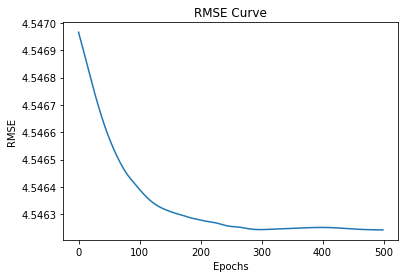


............... Testing Backpropagation Algorithm ................
Testing RMSE: 4.54
Time Cost for Testing algorithm: 0.004987 seconds 
 
[[ 0.99996254]
 [ 0.9999576 ]
 [-0.99995744]
 ...
 [ 0.99996096]
 [-0.99993833]
 [-0.99996373]]


In [553]:
'''
This Back-propagation algorithm is implemented on Combined Cycle Power Plant UCI Dataset. Link is given below
Dataset Link: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant
'''
print("...............Reading the Dataset  and Dataset Pre-Processing ................")
start_time = time.time()
#dataset = shuffle(pd.read_csv("ccip_dataset.csv"))
dataset = shuffle(ccip_dataset_tst)


x = dataset[["AT","V","AP","RH"]]
y = dataset[['PE']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)


# Normalizing data using Standard Scaler Fit Transform
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

# Converting pd dataframe to numpy array to match compatibility
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Pre-processing and Reading the Dataset: %f seconds \n " % total_time)


# Hyperbolic Tangent Activation function
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)

print("............... Initializing hyperparameters ................")
start_time = time.time()
# Setting Hyperparameters
actual_out_size = y_train.size
np.random.seed(10)
inp = 4
hd = 6
out = 1

print("............... Setting 4 weights for hidden layers ................")
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)

rmse_list = []

epochs = 500
eta = 0.0001
alpha = 0.7

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Setting HyperParameters: %f seconds \n " %total_time)

print("............... Training Backpropagation Algorithm ................")
start_time = time.time()
for epoch in range(epochs):
    # Feedforward for 4 hidden layers by calling activation function
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    rmse = np.sqrt(np.mean(np.square(final_out - y_train))) /100
    rmse_list.append(rmse)

    # Backpropagation for 4 hidden layers
    final_err = final_out - y_train
    final_tanh_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_tanh_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)

    # Divide weights as per size of output
    output_weights = np.dot(l4_out.T, final_tanh_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

print("Training RMSE: "+str(round(rmse_list[-1],2)))
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Training algorithm: %f seconds \n " %total_time)

print("............... Plotting RMSE Curve ................")
plt.title("RMSE Curve")
plt.ylabel("RMSE")
plt.xlabel("Epochs")
plt.plot(rmse_list)
plt.show()


print()
print("............... Testing Backpropagation Algorithm ................")
start_time = time.time()

# Feedforward for 4 hidden layers by calling activation function
l1 = np.dot(x_test, w1_l1)
l1_out = hyperbolic_tanh(l1)

l2 = np.dot(l1_out, w2_l2)
l2_out = hyperbolic_tanh(l2)

l3 = np.dot(l2_out, w3_l3)
l3_out = hyperbolic_tanh(l3)

l4 = np.dot(l3_out, w4_l4)
l4_out = hyperbolic_tanh(l4)

output = np.dot(l4_out, out_w)
final_out = hyperbolic_tanh(output)

# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(final_out - y_test))) /100

print("Testing RMSE: "+str(round(rmse,2)))
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " %total_time)

print(final_out)

In [544]:
X.columns

Index(['MSSubClass(scaled)', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'LotShape_(scaled)', 'LotConfig_(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'RoofStyle_(scaled)', 'MasVnrType_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtExposure_(scaled)', 'BsmtFinType1_(scaled)',
       'BsmtFinSF1(scaled)', 'BsmtUnfSF(scaled)', 'TotalBsmtSF(scaled)',
       'HeatingQC_(scaled)', '1stFlrSF(scaled)', '2ndFlrSF(scaled)',
       'GrLivArea(scaled)', 'BsmtFullBath(scaled)', 'FullBath(scaled)',
       'HalfBath(scaled)', 'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)',
       'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)', 'FireplaceQu_(scaled)',
       'GarageType_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'GarageFinish_(scaled)', 'GarageCars(scaled)', 'GarageArea(scaled)',
       'WoodDeckSF(scaled)', 'OpenPorc

In [546]:
y = df_house4['SalePrice(log)']

In [547]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1427    12.128117
1428    12.072547
1429    12.254868
1430    12.493133
1431    11.864469
Name: SalePrice(log), Length: 1432, dtype: float64

In [549]:
x_train

array([[ 0.5464476 ,  0.51496564,  1.63919878, ...,  0.88437415,
        -0.41321925,  0.46627249],
       [ 0.5464476 ,  0.51496564, -0.22803278, ..., -0.73833325,
        -0.42780365,  0.46627249],
       [ 1.49308357,  0.51496564, -0.98501855, ..., -0.73833325,
        -0.94992519,  0.46627249],
       ...,
       [ 0.07312961,  0.51496564, -0.22803278, ...,  0.05646221,
         1.29315561,  0.46627249],
       [ 0.4281181 , -1.80664394, -0.48036137, ..., -0.73833325,
        -1.56247001,  0.46627249],
       [ 2.43971955, -1.80664394,  0.02681699, ...,  0.85125767,
        -1.32620272,  0.46627249]])

In [550]:
x_train.shape

(1145, 43)

In [558]:
len(X.columns)

43

...............Reading the Dataset  and Dataset Pre-Processing ................
Time Cost for Pre-processing and Reading the Dataset: 0.000997 seconds 
 
............... Initializing hyperparameters ................
............... Setting 43 weights for hidden layers ................
Time Cost for Setting HyperParameters: 0.000998 seconds 
 
............... Training Backpropagation Algorithm ................
Training RMSE: 0.12
Time Cost for Training algorithm: 161.238249 seconds 
 
............... Plotting RMSE Curve ................


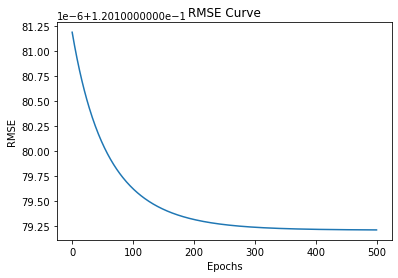


............... Testing Backpropagation Algorithm ................
Time Cost for Testing algorithm: 0.030917 seconds 
 
[[-6.74075271e-05  6.21142682e-05  1.12421430e-04 ...  3.12236118e-04
   1.56531847e-05  7.77426505e-06]
 [-6.76072410e-05  6.22982994e-05  1.12754510e-04 ...  3.13161206e-04
   1.56995617e-05  7.79729852e-06]
 [-3.89309840e-05  3.58738806e-05  6.49286076e-05 ...  1.80330893e-04
   9.04044265e-06  4.48999987e-06]
 ...
 [ 6.76072755e-05 -6.22983311e-05 -1.12754567e-04 ... -3.13161366e-04
  -1.56995697e-05 -7.79730250e-06]
 [ 6.76072573e-05 -6.22983144e-05 -1.12754537e-04 ... -3.13161281e-04
  -1.56995655e-05 -7.79730040e-06]
 [ 6.75993317e-05 -6.22910112e-05 -1.12741319e-04 ... -3.13124569e-04
  -1.56977251e-05 -7.79638633e-06]]


In [568]:
y = df_house4['SalePrice(log)']
'''
This Back-propagation algorithm is implemented on Combined Cycle Power Plant UCI Dataset. Link is given below
Dataset Link: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant
'''
print("...............Reading the Dataset  and Dataset Pre-Processing ................")
start_time = time.time()

#------------------------------------------------------
# #dataset = shuffle(pd.read_csv("ccip_dataset.csv"))
# dataset = shuffle(ccip_dataset_tst)
# dataset = shuffle()

# x = dataset[["AT","V","AP","RH"]]
# y = dataset[['PE']]
#-------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(X_, y, test_size= 0.2)

#--------------------------------------------------------
# Normalizing data using Standard Scaler Fit Transform
# x_train = pre.StandardScaler().fit_transform(x_train)
# x_test = pre.StandardScaler().fit_transform(x_test)
#--------------------------------------------------------

# Converting pd dataframe to numpy array to match compatibility
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Pre-processing and Reading the Dataset: %f seconds \n " % total_time)


# Hyperbolic Tangent Activation function
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)

print("............... Initializing hyperparameters ................")
start_time = time.time()
# Setting Hyperparameters
actual_out_size = y_train.size
np.random.seed(10)
# inp_org : 4
inp = 43
# hd_org : 6
hd = 1

out = 1145

# 1145,43


#print("............... Setting 4 weights for hidden layers ................")
print("............... Setting 43 weights for hidden layers ................")
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)

# more weights should be added ... ?

out_w = np.random.randn(hd, out)

rmse_list = []

epochs = 500
eta = 0.0001
alpha = 0.7

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Setting HyperParameters: %f seconds \n " %total_time)

print("............... Training Backpropagation Algorithm ................")
start_time = time.time()
for epoch in range(epochs):
    # Feedforward for 4 hidden layers by calling activation function
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    rmse = np.sqrt(np.mean(np.square(final_out - y_train))) /100
    rmse_list.append(rmse)

    # Backpropagation for 4 hidden layers
    final_err = final_out - y_train
    final_tanh_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_tanh_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)

    # Divide weights as per size of output
    output_weights = np.dot(l4_out.T, final_tanh_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

print("Training RMSE: "+str(round(rmse_list[-1],2)))
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Training algorithm: %f seconds \n " %total_time)

print("............... Plotting RMSE Curve ................")
plt.title("RMSE Curve")
plt.ylabel("RMSE")
plt.xlabel("Epochs")
plt.plot(rmse_list)
plt.show()


print()
print("............... Testing Backpropagation Algorithm ................")
start_time = time.time()

# Feedforward for 4 hidden layers by calling activation function
l1 = np.dot(x_test, w1_l1)
l1_out = hyperbolic_tanh(l1)

l2 = np.dot(l1_out, w2_l2)
l2_out = hyperbolic_tanh(l2)

l3 = np.dot(l2_out, w3_l3)
l3_out = hyperbolic_tanh(l3)

l4 = np.dot(l3_out, w4_l4)
l4_out = hyperbolic_tanh(l4)

output = np.dot(l4_out, out_w)
final_out = hyperbolic_tanh(output)

# Calculate RMSE
#rmse = np.sqrt(np.mean(np.square(final_out - y_test))) /100
# operands could not be broadcast together with shapes (287,1145) (287,) 
#print("Testing RMSE: "+str(round(rmse,2)))

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " %total_time)

print(final_out)

In [571]:
output

array([[-6.74075272e-05,  6.21142683e-05,  1.12421430e-04, ...,
         3.12236128e-04,  1.56531847e-05,  7.77426505e-06],
       [-6.76072411e-05,  6.22982994e-05,  1.12754510e-04, ...,
         3.13161216e-04,  1.56995617e-05,  7.79729852e-06],
       [-3.89309840e-05,  3.58738806e-05,  6.49286077e-05, ...,
         1.80330895e-04,  9.04044265e-06,  4.48999987e-06],
       ...,
       [ 6.76072756e-05, -6.22983312e-05, -1.12754568e-04, ...,
        -3.13161376e-04, -1.56995697e-05, -7.79730250e-06],
       [ 6.76072574e-05, -6.22983145e-05, -1.12754538e-04, ...,
        -3.13161292e-04, -1.56995655e-05, -7.79730041e-06],
       [ 6.75993318e-05, -6.22910113e-05, -1.12741319e-04, ...,
        -3.13124580e-04, -1.56977251e-05, -7.79638633e-06]])

In [569]:
final_out

array([[-6.74075271e-05,  6.21142682e-05,  1.12421430e-04, ...,
         3.12236118e-04,  1.56531847e-05,  7.77426505e-06],
       [-6.76072410e-05,  6.22982994e-05,  1.12754510e-04, ...,
         3.13161206e-04,  1.56995617e-05,  7.79729852e-06],
       [-3.89309840e-05,  3.58738806e-05,  6.49286076e-05, ...,
         1.80330893e-04,  9.04044265e-06,  4.48999987e-06],
       ...,
       [ 6.76072755e-05, -6.22983311e-05, -1.12754567e-04, ...,
        -3.13161366e-04, -1.56995697e-05, -7.79730250e-06],
       [ 6.76072573e-05, -6.22983144e-05, -1.12754537e-04, ...,
        -3.13161281e-04, -1.56995655e-05, -7.79730040e-06],
       [ 6.75993317e-05, -6.22910112e-05, -1.12741319e-04, ...,
        -3.13124569e-04, -1.56977251e-05, -7.79638633e-06]])

In [572]:
final_out_tst = np.expm1(final_out)

In [576]:
final_out_tst * 100

array([[-0.00674053,  0.00621162,  0.01124277, ...,  0.03122849,
         0.00156533,  0.00077743],
       [-0.0067605 ,  0.00623002,  0.01127609, ...,  0.03132102,
         0.00156997,  0.00077973],
       [-0.00389302,  0.00358745,  0.00649307, ...,  0.01803472,
         0.00090405,  0.000449  ],
       ...,
       [ 0.00676096, -0.00622964, -0.01127482, ..., -0.03131123,
        -0.00156994, -0.00077973],
       [ 0.00676095, -0.00622964, -0.01127482, ..., -0.03131123,
        -0.00156994, -0.00077973],
       [ 0.00676016, -0.00622891, -0.0112735 , ..., -0.03130756,
        -0.00156976, -0.00077964]])

In [577]:
final_out_tst.shape

(287, 1145)

In [ ]:
# result_from_model = cat_fitter.predict(df_house_test_extracted2b_predicted)
# df_house_test['SalePrice'] = 0
# df_house_test['SalePrice'] = np.expm1(result_from_model)
# df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission14_5.csv',index=False)
# df_house_test[['Id','SalePrice']]

In [551]:
w1_l1

array([[ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
        -0.72008556],
       [ 0.26551159,  0.10854853,  0.00429143, -0.17460021,  0.43302619,
         1.20303737],
       [-0.96506567,  1.02827408,  0.22863013,  0.44513761, -1.13660221,
         0.13513688],
       [ 1.484537  , -1.07980489, -1.97772828, -1.7433723 ,  0.26607016,
         2.38496733]])

In [552]:
w1_l1.shape

(4, 6)

In [554]:
x_train

array([[-0.64599805, -1.06620658,  0.89826577, -0.03662299],
       [ 0.14944118,  1.1306458 , -0.33490044,  0.93007065],
       [ 1.02294382,  1.09206308, -0.04563923, -1.29195353],
       ...,
       [ 0.05118895, -1.05990736, -1.70508511,  0.96092258],
       [ 0.48322955, -0.38982802, -1.66279546,  0.42752708],
       [ 0.88296805,  0.36292857,  0.21824819, -1.52574256]])

In [555]:
x_train.shape

(7654, 4)

In [556]:
w1_l1

array([[ 0.99058303,  0.99167614, -1.60253819,  0.54042557,  0.45175727,
        -1.56532083],
       [-0.04019649,  0.28554214, -0.16983316,  0.12809066,  0.29508916,
         0.66445406],
       [-0.48355589,  0.58814112,  0.14172206, -0.2307429 , -0.8961773 ,
         0.69029846],
       [ 1.53744184, -1.22586982, -1.85533497, -2.08060056,  0.30204044,
         3.03023219]])

In [557]:
w1_l1.shape

(4, 6)

### nov10.2022

In [585]:
model_ = Sequential()
#----------------------
# 30, 13, 6
model_.add(Dense(90, input_dim=43, activation='relu'))
model_.add(Dense(21, activation='relu'))
model_.add(Dense(1))
#-----------------------------------------------------------
model_.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam')
#---------------------------------------------------------
model_.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
115/115 [==============================] - 1s 2ms/step - loss: 31.5118
Epoch 2/200
115/115 [==============================] - 0s 2ms/step - loss: 2.2381
Epoch 3/200
115/115 [==============================] - 0s 2ms/step - loss: 1.4547
Epoch 4/200
115/115 [==============================] - 0s 2ms/step - loss: 1.1548
Epoch 5/200
115/115 [==============================] - 0s 2ms/step - loss: 0.9663
Epoch 6/200
115/115 [==============================] - 0s 1ms/step - loss: 0.8318
Epoch 7/200
115/115 [==============================] - 0s 1ms/step - loss: 0.7231
Epoch 8/200
115/115 [==============================] - 0s 1ms/step - loss: 0.6327
Epoch 9/200
115/115 [==============================] - 0s 1ms/step - loss: 0.5776
Epoch 10/200
115/115 [==============================] - 0s 1ms/step - loss: 0.5162
Epoch 11/200
115/115 [==============================] - 0s 2ms/step - loss: 0.4591
Epoch 12/200
115/115 [==============================] - 0s 2ms/step - loss: 0.4106
Epoch 13/200

115/115 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 100/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0719
Epoch 101/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0538
Epoch 102/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 103/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0359
Epoch 104/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 105/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 106/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 107/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 108/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0394
Epoch 109/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0362
Epoch 110/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 

115/115 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 197/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 198/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 199/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 200/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0298


In [586]:
print('Test Accuracy : {}'.format(model_.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.5497
Test Accuracy : 0.549706220626831


In [587]:
result_from_model = model_.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_3.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,171756.968750
1,1462,170096.406250
2,1463,131561.234375
3,1464,234386.015625
4,1465,196595.859375
...,...,...
1454,2915,168828.562500
1455,2916,106568.679688
1456,2917,243363.859375
1457,2918,213592.421875


In [593]:
model__ = Sequential()
#----------------------
# 30, 13, 6
model__.add(Dense(90, input_dim=43, activation='relu'))
model__.add(Dense(21, activation='relu'))
model__.add(Dense(1))
#-----------------------------------------------------------
model__.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
#---------------------------------------------------------
model__.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
115/115 [==============================] - 1s 1ms/step - loss: 35.6898 - rmse: 5.9741
Epoch 2/200
115/115 [==============================] - 0s 1ms/step - loss: 2.5811 - rmse: 1.6066
Epoch 3/200
115/115 [==============================] - 0s 1ms/step - loss: 1.6675 - rmse: 1.2913
Epoch 4/200
115/115 [==============================] - 0s 2ms/step - loss: 1.2578 - rmse: 1.1215
Epoch 5/200
115/115 [==============================] - 0s 1ms/step - loss: 1.0084 - rmse: 1.0042
Epoch 6/200
115/115 [==============================] - 0s 2ms/step - loss: 0.8479 - rmse: 0.9208
Epoch 7/200
115/115 [==============================] - 0s 1ms/step - loss: 0.7168 - rmse: 0.8467
Epoch 8/200
115/115 [==============================] - 0s 1ms/step - loss: 0.6164 - rmse: 0.7851
Epoch 9/200
115/115 [==============================] - 0s 1ms/step - loss: 0.5437 - rmse: 0.7374
Epoch 10/200
115/115 [==============================] - 0s 1ms/step - loss: 0.4904 - rmse: 0.7003
Epoch 11/200
115/115 [======

115/115 [==============================] - 0s 2ms/step - loss: 0.0435 - rmse: 0.2086
Epoch 85/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0421 - rmse: 0.2052
Epoch 86/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0548 - rmse: 0.2342
Epoch 87/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0564 - rmse: 0.2376
Epoch 88/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0404 - rmse: 0.2009
Epoch 89/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0350 - rmse: 0.1871
Epoch 90/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0350 - rmse: 0.1872
Epoch 91/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0349 - rmse: 0.1867
Epoch 92/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0289 - rmse: 0.1700
Epoch 93/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0440 - rmse: 0.2098
Epoch 94/200
115/115 [===========

115/115 [==============================] - 0s 2ms/step - loss: 0.0329 - rmse: 0.1813
Epoch 168/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0319 - rmse: 0.1786
Epoch 169/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0431 - rmse: 0.2077
Epoch 170/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0420 - rmse: 0.2049
Epoch 171/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0242 - rmse: 0.1556
Epoch 172/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 173/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0248 - rmse: 0.1576
Epoch 174/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0177 - rmse: 0.1332
Epoch 175/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0145 - rmse: 0.1202
Epoch 176/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 177/200
115/115 [=

In [594]:
print('Test Accuracy : {}'.format(model__.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.5356 - rmse: 0.7319
Test Accuracy : [0.5356471538543701, 0.7318791747093201]


In [595]:
result_from_model = model__.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_3_2.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,238821.812500
1,1462,144618.812500
2,1463,164692.390625
3,1464,262058.265625
4,1465,127007.515625
...,...,...
1454,2915,109849.789062
1455,2916,299706.500000
1456,2917,893266.625000
1457,2918,295952.500000


In [596]:
model___ = Sequential()
#----------------------
# 30, 13, 6
model___.add(Dense(90, input_dim=43, activation='relu'))
model___.add(Dense(21, activation='relu'))
model___.add(Dense(1))
#-----------------------------------------------------------
model___.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam', metrics=['accuracy'])
#---------------------------------------------------------
model___.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
115/115 [==============================] - 1s 1ms/step - loss: 42.6791 - accuracy: 0.0000e+00
Epoch 2/200
115/115 [==============================] - 0s 1ms/step - loss: 2.4625 - accuracy: 0.0000e+00
Epoch 3/200
115/115 [==============================] - 0s 1ms/step - loss: 1.5809 - accuracy: 0.0000e+00
Epoch 4/200
115/115 [==============================] - 0s 1ms/step - loss: 1.2519 - accuracy: 0.0000e+00
Epoch 5/200
115/115 [==============================] - 0s 1ms/step - loss: 1.0367 - accuracy: 0.0000e+00
Epoch 6/200
115/115 [==============================] - 0s 2ms/step - loss: 0.9020 - accuracy: 0.0000e+00
Epoch 7/200
115/115 [==============================] - 0s 1ms/step - loss: 0.7679 - accuracy: 0.0000e+00
Epoch 8/200
115/115 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.0000e+00
Epoch 9/200
115/115 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.0000e+00
Epoch 10/200
115/115 [==============================] 

115/115 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.0000e+00
Epoch 79/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.0000e+00
Epoch 80/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.0000e+00
Epoch 81/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.0000e+00
Epoch 82/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.0000e+00
Epoch 83/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.0000e+00
Epoch 84/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.0000e+00
Epoch 85/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.0000e+00
Epoch 86/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.0000e+00
Epoch 87/200
115/115 [==============================] - 0s 

115/115 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 155/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.0000e+00
Epoch 156/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 157/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.0000e+00
Epoch 158/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.0000e+00
Epoch 159/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 0.0000e+00
Epoch 160/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.0000e+00
Epoch 161/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.0000e+00
Epoch 162/200
115/115 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.0000e+00
Epoch 163/200
115/115 [============================

In [597]:
print('Test Accuracy : {}'.format(model___.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.0000e+00
Test Accuracy : [0.5754716396331787, 0.0]


In [599]:
result_from_model = model___.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_3_3.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,121481.937500
1,1462,96444.757812
2,1463,200834.671875
3,1464,327809.968750
4,1465,139283.187500
...,...,...
1454,2915,97251.359375
1455,2916,155031.093750
1456,2917,124096.132812
1457,2918,142963.531250


In [600]:
model_4 = Sequential()
model_4.add(Dense(100, input_dim=43, activation='relu'))
#------------------------------------------------------------
### 2/3 size of input layer , 28.67
#---------------------------------------------------------
model_4.add(Dense(96, activation='relu'))
model_4.add(Dense(92, activation='relu'))
model_4.add(Dense(88, activation='relu'))
model_4.add(Dense(84, activation='relu'))
model_4.add(Dense(80, activation='relu'))
model_4.add(Dense(76, activation='relu'))
model_4.add(Dense(72, activation='relu'))
model_4.add(Dense(68, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(60, activation='relu'))
model_4.add(Dense(56, activation='relu'))
model_4.add(Dense(52, activation='relu'))
model_4.add(Dense(48, activation='relu'))
model_4.add(Dense(44, activation='relu'))
model_4.add(Dense(40, activation='relu'))
model_4.add(Dense(36, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(28, activation='relu'))
model_4.add(Dense(24, activation='relu'))
model_4.add(Dense(20, activation='relu'))
model_4.add(Dense(16, activation='relu'))
model_4.add(Dense(12, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(4, activation='relu'))
#---------------------------------------------------
model_4.add(Dense(1))
model_4.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam', metrics=['accuracy']) # 
model_4.fit(X_train,y_train, epochs=200, batch_size=10)

Epoch 1/200
115/115 [==============================] - 2s 3ms/step - loss: 27.4800 - accuracy: 0.0000e+00
Epoch 2/200
115/115 [==============================] - 0s 3ms/step - loss: 1.3252 - accuracy: 0.0000e+00
Epoch 3/200
115/115 [==============================] - 0s 3ms/step - loss: 1.0053 - accuracy: 0.0000e+00
Epoch 4/200
115/115 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.0000e+00
Epoch 5/200
115/115 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.0000e+00
Epoch 6/200
115/115 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.0000e+00
Epoch 7/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2942 - accuracy: 0.0000e+00
Epoch 8/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2881 - accuracy: 0.0000e+00
Epoch 9/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.0000e+00
Epoch 10/200
115/115 [==============================] 

115/115 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 79/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 80/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 81/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 82/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 83/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.0000e+00
Epoch 84/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.0000e+00
Epoch 85/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.0000e+00
Epoch 86/200
115/115 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.0000e+00
Epoch 87/200
115/115 [==============================] - 0s 

115/115 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 155/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 156/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 157/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 158/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 159/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 160/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 161/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 162/200
115/115 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 163/200
115/115 [============================

In [601]:
print('Test Accuracy : {}'.format(model_4.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.0000e+00
Test Accuracy : [0.21915064752101898, 0.0]


In [602]:
result_from_model = model_4.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_4.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 2ms/step


,Id,SalePrice
0,1461,133205.515625
1,1462,202684.328125
2,1463,170856.296875
3,1464,121755.429688
4,1465,222578.328125
...,...,...
1454,2915,131072.562500
1455,2916,189902.281250
1456,2917,152768.359375
1457,2918,137575.296875


In [604]:
model_5 = Sequential()
model_5.add(Dense(100, input_dim=43, activation='relu'))
#------------------------------------------------------------
### 2/3 size of input layer , 28.67
#---------------------------------------------------------
model_5.add(Dense(98, activation='relu'))
model_5.add(Dense(96, activation='relu'))
model_5.add(Dense(94, activation='relu'))
model_5.add(Dense(92, activation='relu'))
model_5.add(Dense(90, activation='relu'))
model_5.add(Dense(88, activation='relu'))
model_5.add(Dense(86, activation='relu'))
model_5.add(Dense(84, activation='relu'))
model_5.add(Dense(82, activation='relu'))
model_5.add(Dense(80, activation='relu'))
model_5.add(Dense(78, activation='relu'))
model_5.add(Dense(76, activation='relu'))
model_5.add(Dense(74, activation='relu'))
model_5.add(Dense(72, activation='relu'))
model_5.add(Dense(70, activation='relu'))
model_5.add(Dense(68, activation='relu'))
model_5.add(Dense(66, activation='relu'))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(62, activation='relu'))
model_5.add(Dense(60, activation='relu'))
model_5.add(Dense(58, activation='relu'))
model_5.add(Dense(56, activation='relu'))
model_5.add(Dense(54, activation='relu'))
model_5.add(Dense(52, activation='relu'))
model_5.add(Dense(50, activation='relu'))
model_5.add(Dense(48, activation='relu'))
model_5.add(Dense(46, activation='relu'))
model_5.add(Dense(44, activation='relu'))
model_5.add(Dense(42, activation='relu'))
model_5.add(Dense(40, activation='relu'))
model_5.add(Dense(38, activation='relu'))
model_5.add(Dense(36, activation='relu'))
model_5.add(Dense(34, activation='relu'))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dense(30, activation='relu'))
model_5.add(Dense(28, activation='relu'))
model_5.add(Dense(26, activation='relu'))
model_5.add(Dense(24, activation='relu'))
model_5.add(Dense(22, activation='relu'))
model_5.add(Dense(20, activation='relu'))
model_5.add(Dense(18, activation='relu'))
model_5.add(Dense(16, activation='relu'))
model_5.add(Dense(14, activation='relu'))
model_5.add(Dense(12, activation='relu'))
model_5.add(Dense(10, activation='relu'))
model_5.add(Dense(8, activation='relu'))
model_5.add(Dense(6, activation='relu'))
model_5.add(Dense(4, activation='relu'))
model_5.add(Dense(2, activation='relu'))
#---------------------------------------------------
model_5.add(Dense(1))
model_5.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam', metrics=['accuracy']) # 
model_5.fit(X_train,y_train, epochs=1000, batch_size=10)

Epoch 1/1000
115/115 [==============================] - 3s 4ms/step - loss: 134.4598 - accuracy: 0.0000e+00
Epoch 2/1000
115/115 [==============================] - 0s 4ms/step - loss: 9.3992 - accuracy: 0.0000e+00
Epoch 3/1000
115/115 [==============================] - 0s 4ms/step - loss: 1.0178 - accuracy: 0.0000e+00
Epoch 4/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.5557 - accuracy: 0.0000e+00
Epoch 5/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.0000e+00
Epoch 6/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.3520 - accuracy: 0.0000e+00
Epoch 7/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.2238 - accuracy: 0.0000e+00
Epoch 8/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.0000e+00
Epoch 9/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.0000e+00
Epoch 10/1000
115/115 [=====================

115/115 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.0000e+00
Epoch 78/1000
115/115 [==============================] - 1s 4ms/step - loss: 0.0429 - accuracy: 0.0000e+00
Epoch 79/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.0000e+00
Epoch 80/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 81/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.0000e+00
Epoch 82/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.0000e+00
Epoch 83/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.0000e+00
Epoch 84/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.0000e+00
Epoch 85/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.0000e+00
Epoch 86/1000
115/115 [============================

115/115 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 154/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 155/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.0000e+00
Epoch 156/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.0000e+00
Epoch 157/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 158/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.0000e+00
Epoch 159/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 160/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.0000e+00
Epoch 161/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.0000e+00
Epoch 162/1000
115/115 [===================

Epoch 229/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 230/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 231/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 232/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 233/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 234/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 235/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 236/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.0000e+00
Epoch 237/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 238/1000
115/115 [====

115/115 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 305/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 306/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 307/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 308/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 309/1000
115/115 [==============================] - 1s 4ms/step - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 310/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 311/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 312/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 313/1000
115/115 [===================

Epoch 380/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 381/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 382/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 383/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 384/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 385/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 386/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 387/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 388/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 389/1000
115/115 [====

115/115 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 456/1000
115/115 [==============================] - 1s 6ms/step - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 457/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 458/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 459/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 460/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 461/1000
115/115 [==============================] - 1s 6ms/step - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 462/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 463/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 464/1000
115/115 [===================

Epoch 531/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 532/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 533/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 534/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 535/1000
115/115 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 536/1000
115/115 [==============================] - 1s 4ms/step - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 537/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 538/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 539/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 540/1000
115/115 [====

115/115 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 607/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 608/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 609/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 610/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 611/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 612/1000
115/115 [==============================] - 1s 4ms/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 613/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 614/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 615/1000
115/115 [===================

Epoch 682/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 683/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 684/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 685/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 686/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 687/1000
115/115 [==============================] - 1s 6ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 688/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 689/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 690/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 691/1000
115/115 [====

115/115 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 758/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 759/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 760/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 761/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 762/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 763/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 764/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 765/1000
115/115 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 766/1000
115/115 [===================

Epoch 833/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 834/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 835/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 836/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 837/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 838/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 839/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 840/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 841/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 842/1000
115/115 [====

115/115 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 909/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 910/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 911/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 912/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 913/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 914/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 915/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 916/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 917/1000
115/115 [===================

Epoch 984/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 985/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 986/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 987/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 988/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 989/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 990/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 991/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 992/1000
115/115 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 993/1000
115/115 [====

In [605]:
print('Test Accuracy : {}'.format(model_5.evaluate(X_test,y_test)))

9/9 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.0000e+00
Test Accuracy : [0.2665681838989258, 0.0]


In [606]:
result_from_model = model_5.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_5.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 2ms/step


,Id,SalePrice
0,1461,160987.781250
1,1462,194111.140625
2,1463,102971.109375
3,1464,176381.468750
4,1465,157024.250000
...,...,...
1454,2915,118825.421875
1455,2916,161750.328125
1456,2917,164342.984375
1457,2918,125617.156250


In [578]:
X_.shape

(1432, 43)

In [607]:
model_6 = Sequential()
model_6.add(Dense(43, input_dim=43, activation='relu'))
#------------------------------------------------------------
### 2/3 size of input layer , 28.67
#---------------------------------------------------------
model_6.add(Dense(40, activation='relu'))
model_6.add(Dense(37, activation='relu'))
model_6.add(Dense(34, activation='relu'))
model_6.add(Dense(31, activation='relu'))
model_6.add(Dense(28, activation='relu'))
model_6.add(Dense(25, activation='relu'))
model_6.add(Dense(22, activation='relu'))
model_6.add(Dense(19, activation='relu'))
model_6.add(Dense(16, activation='relu'))
model_6.add(Dense(13, activation='relu'))
model_6.add(Dense(10, activation='relu'))
model_6.add(Dense(7, activation='relu'))
model_6.add(Dense(4, activation='relu'))
#---------------------------------------------------
model_6.add(Dense(1))
model_6.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam', metrics=['accuracy']) # 
model_6.fit(X_train,y_train, epochs=300, batch_size=10)

Epoch 1/300
115/115 [==============================] - 1s 2ms/step - loss: 84.7856 - accuracy: 0.0000e+00
Epoch 2/300
115/115 [==============================] - 0s 2ms/step - loss: 3.0629 - accuracy: 0.0000e+00
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 1.8515 - accuracy: 0.0000e+00
Epoch 4/300
115/115 [==============================] - 0s 2ms/step - loss: 1.3804 - accuracy: 0.0000e+00
Epoch 5/300
115/115 [==============================] - 0s 2ms/step - loss: 1.1157 - accuracy: 0.0000e+00
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.9776 - accuracy: 0.0000e+00
Epoch 7/300
115/115 [==============================] - 0s 2ms/step - loss: 0.7785 - accuracy: 0.0000e+00
Epoch 8/300
115/115 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.0000e+00
Epoch 9/300
115/115 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.0000e+00
Epoch 10/300
115/115 [==============================] 

115/115 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.0000e+00
Epoch 79/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.0000e+00
Epoch 80/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.0000e+00
Epoch 81/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.0000e+00
Epoch 82/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.0000e+00
Epoch 83/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 84/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.0000e+00
Epoch 85/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.0000e+00
Epoch 86/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 87/300
115/115 [==============================] - 0s 

115/115 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.0000e+00
Epoch 155/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.0000e+00
Epoch 156/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 157/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.0000e+00
Epoch 158/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.0000e+00
Epoch 159/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.0000e+00
Epoch 160/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.0000e+00
Epoch 161/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 162/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.0000e+00
Epoch 163/300
115/115 [============================

115/115 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.0000e+00
Epoch 231/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.0000e+00
Epoch 232/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 233/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.0000e+00
Epoch 234/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.0000e+00
Epoch 235/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.0000e+00
Epoch 236/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 237/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.0000e+00
Epoch 238/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.0000e+00
Epoch 239/300
115/115 [============================

In [608]:
result_from_model = model_6.predict(df_house_test_extracted2b_predicted)
df_house_test['SalePrice'] = 0
df_house_test['SalePrice'] = np.expm1(result_from_model)
df_house_test[['Id','SalePrice']].to_csv('C:/Users/thsong/submission15_6.csv',index=False)
df_house_test[['Id','SalePrice']]

46/46 [==============================] - 0s 1ms/step


,Id,SalePrice
0,1461,139976.562500
1,1462,193380.187500
2,1463,132996.062500
3,1464,169006.562500
4,1465,188757.890625
...,...,...
1454,2915,111106.312500
1455,2916,255799.765625
1456,2917,331956.687500
1457,2918,194944.484375


In [ ]:
### do further NN experiment after you study how to design neural networks